In [61]:
%run init.py # notebook initialization
import matplotlib.patheffects as pe

%run retrieve-data.ipynb # donwload and format DPC Covid data
ita = pd.read_pickle('dataframes/mydata_dpc_ita.p') # national and regional dataframes
prov = pd.read_pickle('dataframes/mydata_dpc_ita_province.p') # province dataframe

popdf = pd.read_csv('dataframes/tavola_pop_res01.csv')

ita['date'] = ita['date'] - timedelta(hours=17)
prov['date'] = prov['date'] - timedelta(hours=17)

lastday = ita.date.iat[-1]
print('Dati regionali aggiornati a:', lastday)
print('Dati provinciali aggiornati a:', prov.date.iat[-1])

lockdown_date = pd.Timestamp(datetime.datetime(2020,3,11))
phase2_date = pd.Timestamp(datetime.datetime(2020,5,4))
bmk_p2 = ita[ita.date==phase2_date]

# WEEKLY DATA!!!
ita_weekly = ita.groupby(['region','weekid'],as_index=False).sum()
ita_weekly['date'] = ita_weekly['weekid'].map(lambda weekid: datetime.datetime.strptime('%04d-%02d-1' % (int(weekid/100), weekid-int(weekid/100)*100), '%G-%V-%w').date()+timedelta(days=6))

prov_weekly = prov.groupby(['provincia','weekid'],as_index=False).sum()
prov_weekly['date'] = prov_weekly['weekid'].map(lambda weekid: datetime.datetime.strptime('%04d-%02d-1' % (int(weekid/100), weekid-int(weekid/100)*100), '%G-%V-%w').date()+timedelta(days=6))


#############################################
# Useful functions
#############################################
def sorted_set(regions, var):
    '''Ordina set rispetto alla variabile var'''
    df = data[data.region.isin(regions)][data.date==lastday].sort_values(var, ascending=False)
    sortedset = df.region.unique()
    return sortedset

def leglabels_style():
    '''Make legend labels colored'''
    leg._legend_box.align = "left"
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
        
def format_dateaxis():
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
def sorted_set_prov(df, province, var):
    '''Ordina set rispetto alla variabile var'''
    df = df[df.provincia.isin(province)][df.date==lastday].sort_values(var, ascending=False)
    sortedset = df.provincia.unique()
    return sortedset

Current time: 2021-01-17 16:30:17.106004


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Dati regionali aggiornati a: 2021-01-16 00:00:00
Dati provinciali aggiornati a: 2021-01-16 00:00:00


In [62]:
# Anvil uplink
import anvil.server
anvil.server.connect("W6VHTQJ2GW45WESWAKIGC34P-NHC2WJXV3Q4EUOCT")

In [63]:

#@anvil.server.callable
#def show_plot():
    #img = load_img('./variations_italia.png')
    #return img

In [64]:
'''
matplotlib.font_manager._rebuild()

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))
'''

'\nmatplotlib.font_manager._rebuild()\n\nimport matplotlib.font_manager\nfrom IPython.core.display import HTML\n\ndef make_html(fontname):\n    return "<p>{font}: <span style=\'font-family:{font}; font-size: 24px;\'>{font}</p>".format(font=fontname)\n\ncode = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])\n\nHTML("<div style=\'column-count: 2;\'>{}</div>".format(code))\n'

In [65]:
summary = ita[ita.date==lastday].sort_values('new_cases', ascending=False)
summary = summary[['region','cases','new_cases','deaths','new_deaths','terapia_intensiva','cases_per100k','deaths_per100k']]
summary['cases_per100k'] = summary['cases_per100k'].map('{:.1f}'.format)
summary['deaths_per100k'] = summary['deaths_per100k'].map('{:.1f}'.format)
summary.head(30)

region    cases  new_cases  deaths  new_deaths  \
327                  Italia  2368733      16310   81800         475   
983                    Nord  1413869       8686   58622         329   
1311                    Sud   510684       4959   10835          67   
655                  Centro   444180       2665   12343          79   
4263              Lombardia   512563       2134   26172          78   
6887                Sicilia   119290       1954    2954          38   
8199                 Veneto   296803       1929    7932          73   
2951         Emilia-Romagna   200552       1674    8705          48   
3607                  Lazio   188400       1282    4378          36   
2623               Campania   206128       1132    3335           0   
6231                 Puglia   108520       1123    2825          15   
5903               Piemonte   212265       1056    8381          62   
3279  Friuli Venezia Giulia    60381        870    2070          35   
5247           P.A. Bolzano    33211        496     807           5   
7215                Toscana   127446        436    3957          17   
4591                 Marche    49671        409    1772           9   
6559               Sardegna    35572        368     898          10   
3935                Liguria    65535        321    3104          20   
2295               Calabria    28722        295     532           2   
7543                 Umbria    32150        241     689           7   
1639                Abruzzo    39030        196    1317           6   
5575            P.A. Trento    24938        186    1058           7   
4919                 Molise     7483        101     230           4   
1967             Basilicata    12452         87     291           2   
7871          Valle d'Aosta     7621         20     393           1   

      terapia_intensiva cases_per100k deaths_per100k  
327                2520        3915.4          135.2  
983                1390        5093.6          211.2  
1311                536        2679.8           56.9  
655                 594        3246.2           90.2  
4263                454        5105.2          260.7  
6887                212        2385.9           59.1  
8199                338        6044.9          161.5  
2951                231        4506.8          195.6  
3607                286        3193.2           74.2  
2623                 97        3535.6           57.2  
6231                148        2679.5           69.8  
5903                162        4846.2          191.3  
3279                 66        4949.3          169.7  
5247                 26        6254.4          152.0  
7215                125        3407.6          105.8  
4591                 85        3246.5          115.8  
6559                 49        2155.9           54.4  
3935                 63        4201.0          199.0  
2295                 27        1465.4           27.1  
7543                 49        3632.8           77.9  
1639                 41        2956.8           99.8  
5575                 46        4609.6          195.6  
4919                  8        2429.5           74.7  
1967                  3        2196.1           51.3  
7871                  4        6048.4          311.9

In [66]:
summary = prov[prov.date==lastday].sort_values('new_cases', ascending=False)
summary = summary[['provincia','region','new_cases','cases']]
summary['new_cases'] = summary['new_cases'].map('{:.0f}'.format)
summary = summary.reset_index(drop=True)
summary.head(30)

provincia                 region new_cases  \
0   Fuori Regione / Provincia Autonoma              Lombardia      4672   
1   Fuori Regione / Provincia Autonoma                 Veneto      3694   
2   Fuori Regione / Provincia Autonoma                  Lazio      3025   
3   Fuori Regione / Provincia Autonoma         Emilia-Romagna      2310   
4   Fuori Regione / Provincia Autonoma               Piemonte      1097   
5   Fuori Regione / Provincia Autonoma                 Umbria       755   
6                               Milano              Lombardia       729   
7                               Napoli               Campania       590   
8                               Latina                  Lazio       563   
9   Fuori Regione / Provincia Autonoma                Toscana       555   
10                              Torino               Piemonte       544   
11                             Bolzano           P.A. Bolzano       496   
12                             Venezia                 Veneto       456   
13                             Catania                Sicilia       443   
14                             Messina                Sicilia       434   
15                             Palermo                Sicilia       423   
16                             Bologna         Emilia-Romagna       420   
17                               Udine  Friuli Venezia Giulia       417   
18                                Bari                 Puglia       406   
19                              Padova                 Veneto       366   
20                             Brescia              Lombardia       320   
21                             Vicenza                 Veneto       305   
22                              Modena         Emilia-Romagna       289   
23                           Pordenone  Friuli Venezia Giulia       280   
24                              Verona                 Veneto       267   
25                             Treviso                 Veneto       246   
26                             Taranto                 Puglia       239   
27                             Viterbo                  Lazio       231   
28                                Roma                  Lazio       218   
29                              Foggia                 Puglia       217   

     cases  
0     5925  
1     3957  
2     3785  
3     2310  
4     1097  
5     1310  
6   182780  
7   125111  
8    17896  
9      555  
10  111011  
11   33211  
12   47039  
13   34392  
14   15175  
15   32115  
16   44951  
17   26530  
18   41466  
19   54295  
20   47503  
21   49068  
22   35104  
23   13262  
24   57705  
25   58469  
26   14017  
27   10124  
28  134617  
29   23351

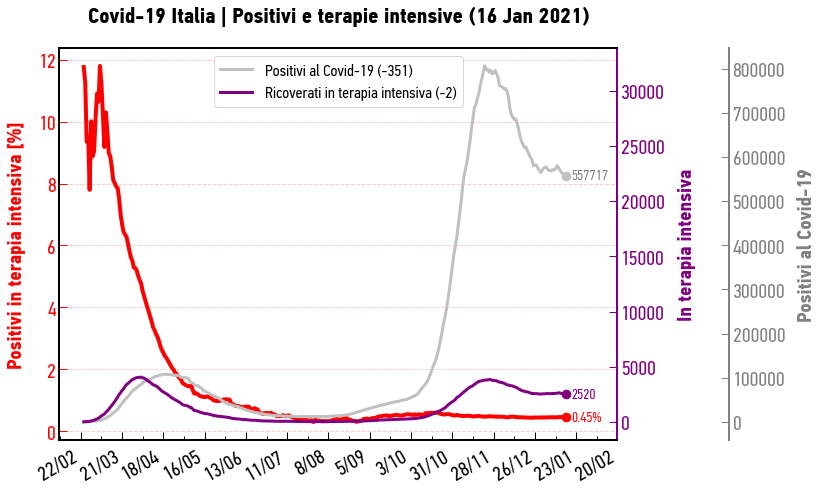

In [67]:
fig = plt.figure(figsize=(10,8))
ax_ = fig.add_subplot(111)

data = ita[(ita.region=='Italia')]
axx = ax_.twinx()

ax_.plot(data.date, data.terapia_intensiva/data.totale_positivi*100, label='Positivi in terapia intensiva [%]', color='r', lw=4)
ax_.scatter(data.date.iat[-1], data.terapia_intensiva.iat[-1]/data.totale_positivi.iat[-1]*100, 
         label='', color='r', s=75)
ax_.text(data.date.iat[-1]+timedelta(days=4),data.terapia_intensiva.iat[-1]/data.totale_positivi.iat[-1]*100, 
         '%.2f%s' % (data.terapia_intensiva.iat[-1]/data.totale_positivi.iat[-1]*100, '%'), 
         color='r', va='center', ha='left', fontsize=14
        )



ax_.tick_params(colors='r', axis='y')
ax_.set_ylabel('Positivi in terapia intensiva [%]', color='r')

#plt.ylabel('Casi totali per 100k abitanti')
ax_.grid(axis='y', linewidth=1, alpha=0.2, ls='--', which='both', color='r', zorder=-500)
#plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
#ax.tick_params(axis='x', which='major', labelsize=16)

axx.plot(data.date, data.totale_positivi/25, alpha=1, label='Positivi al Covid-19 (%+d)' % data.new_totale_positivi.iat[-1], color='silver')
axx.plot(data.date, data.terapia_intensiva, alpha=1, label='Ricoverati in terapia intensiva (%+d)' % data.new_terapia_intensiva.iat[-1], color='purple')

axx.scatter(data.date.iat[-1], data.totale_positivi.iat[-1]/25, 
         label='', color='silver', s=75, alpha=1)
axx.text(data.date.iat[-1]+timedelta(days=4),data.totale_positivi.iat[-1]/25, 
         '%d' % (data.totale_positivi.iat[-1]), 
         color='grey', va='center', ha='left', fontsize=14
        )

axx.scatter(data.date.iat[-1], data.terapia_intensiva.iat[-1], 
         label='', color='purple', s=75)
axx.text(data.date.iat[-1]+timedelta(days=4),data.terapia_intensiva.iat[-1], 
         '%d' % (data.terapia_intensiva.iat[-1]), 
         color='purple', va='center', ha='left', fontsize=14
        )

axx.tick_params(axis='y', colors='purple')
axx.set_ylabel('', color='purple')

axx.set_xlim(right=data.date.iat[-1]+timedelta(days=35))
ax_.xaxis.set_minor_locator(mdates.DayLocator(interval=14))
ax_.xaxis.set_major_locator(mdates.DayLocator(interval=28))
ax_.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

#legend
leg = axx.legend(loc='upper center',fontsize=16) 
leg._legend_box.align = "left"

plt.title('Covid-19 Italia | Positivi e terapie intensive (%s)' % lastday.strftime('%-d %b %Y'), y=1.05)


ax_2 = ax_.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
ax_2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
#make_patch_spines_invisible(par2)
# Second, show the right spine.
ax_2.spines["right"].set_visible(True)
ax_2.spines["right"].set_color('grey')
ax_2.set_ylabel('Positivi al Covid-19', color='grey')
ax_2.tick_params(axis='y', colors='grey')
ax_2.set_ylim(axx.get_ylim()[0]*25,axx.get_ylim()[1]*25,)

axx.spines["right"].set_position(("axes", 1))
axx.spines["right"].set_visible(True)
axx.spines["right"].set_color('purple')
axx.set_ylabel('In terapia intensiva', color='purple')

ax_.spines["right"].set_position(("axes", 0))
ax_.spines["right"].set_visible(True)
ax_.spines["right"].set_color('r')

plt.show()

    
#cumulative(regions, colors, 'cases_per100k', title='COVID-19 Casi (Totale assoluto)', ylabel='Casi totali')
#cumulative(regions, colors, 'deaths', title='COVID-19 Morti (Totale assoluto)', ylabel='Morti totali')
#cumulative(regions, colors, 'recovered', title='COVID-19 Guariti (Totale assoluto)', ylabel='Guariti totali')
#cumulative(regions, colors, 'tests', title='COVID-19 Tamponi (Totale assoluto)', ylabel='Tamponi totali')

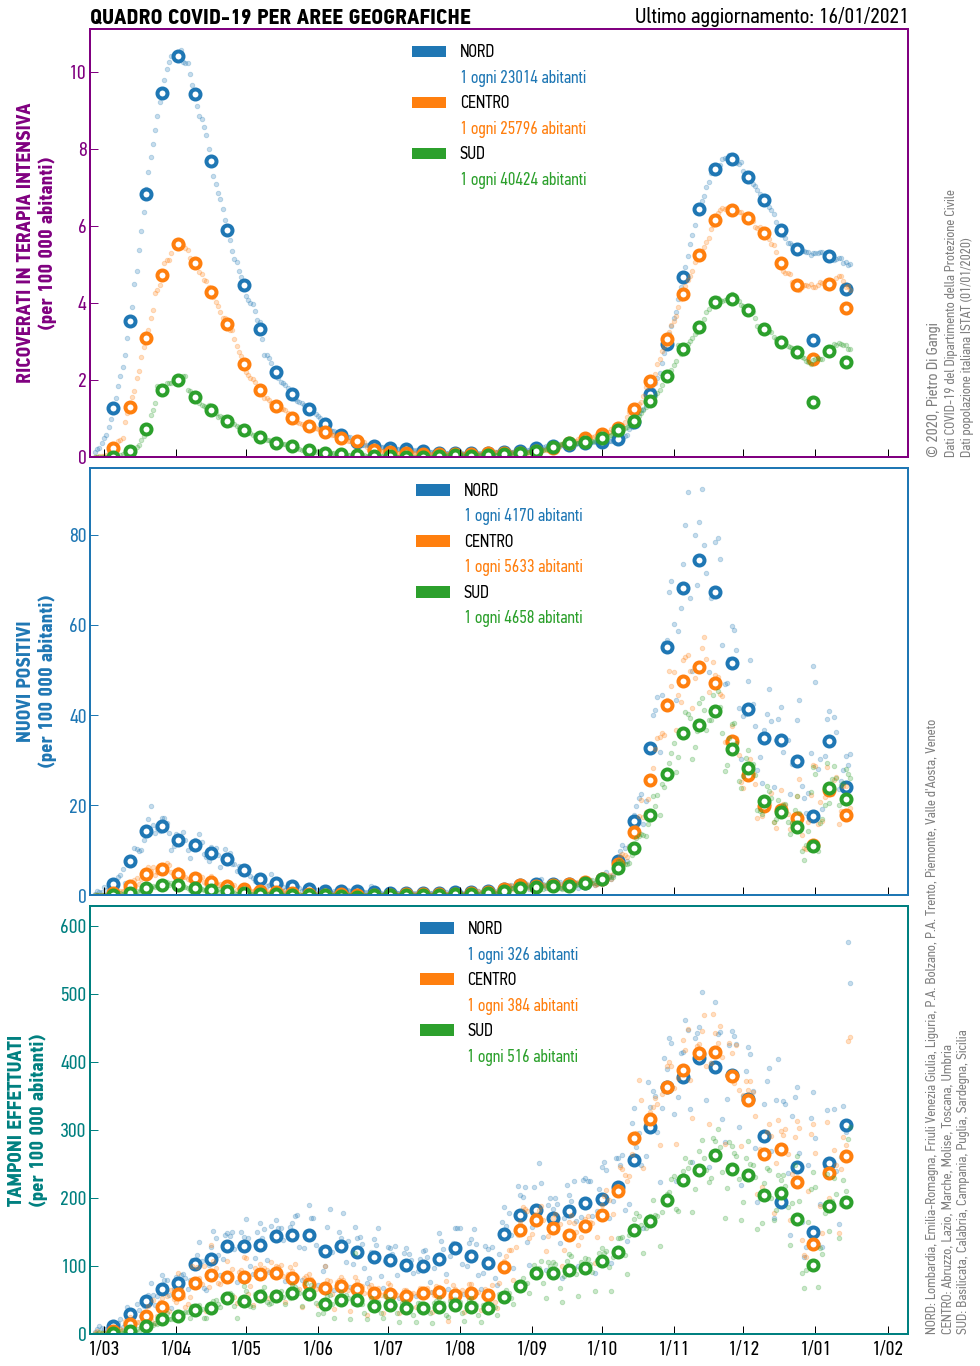

In [68]:
def color_frame(ax, color):
    [ax.spines[side].set_color(color) for side in ax.spines.keys()]
    
def scatter_daily(df, ax, var, color):
    ax.scatter(df.date[2:], df[var][2:], color=color, alpha=0.25, s=20)
    
def line_daily(df, ax, var, color):
    ax.plot(df.date[2:], df[var][2:], color=color, alpha=0.5, lw=1, ls='--')

def weekly_avg(df, ax, var, color):
    ax.scatter(df.date[1:-1]-timedelta(days=3, hours=12), df[var][1:-1]/7, 
               edgecolor=color, color='w', linestyle='-', linewidth=4, marker='o', s=100)

def set_yaxis(ax, label, color):
    ax.set_ylabel(label, color=color)
    ax.tick_params(axis='y', colors=color)

#legend
def build_legend(ax, colors, var):
    '''
    lb1 = '%s: %+d' % (label1, df_[var].iat[-1])
    lb2 = 'Media settimanale: %+.0f' % (df[var].iat[-2]/7)
    diff1 = (df[var].iat[-2] - df[var].iat[-3])/df[var].iat[-3]*100
    diff2 = (df[var].iat[-3] - df[var].iat[-4])/df[var].iat[-4]*100
    diff3 = (df[var].iat[-4] - df[var].iat[-5])/df[var].iat[-5]*100
    lb3 = 'Variazione relativa su base settimanale:'
    lb4 = '%+.0f%s (ultima settimana)' % (diff1, '%')
    lb5 = '%+.0f%s (2 settimane fa)' % (diff2, '%')
    lb6 = '%+.0f%s (3 settimane fa)' % (diff3, '%')
    '''
    nord = ita_weekly[ita_weekly.region=='Nord']
    centro = ita_weekly[ita_weekly.region=='Centro']
    sud = ita_weekly[ita_weekly.region=='Sud']
    lb1 = '1 ogni %.0f abitanti' % (1e5/(nord[var].iat[-2]/7))
    lb2 = '1 ogni %.0f abitanti' % (1e5/(centro[var].iat[-2]/7))
    lb3 = '1 ogni %.0f abitanti' % (1e5/(sud[var].iat[-2]/7))
    legend_elements = [
        Patch(facecolor=colors[0], label='NORD'),
        Line2D([0], [0], color=colors[0], linestyle='None', label=lb1),
        Patch(facecolor=colors[1], label='CENTRO'),
        Line2D([0], [0], color=colors[1], linestyle='None', label=lb2),
        Patch(facecolor=colors[2], label='SUD'),
        Line2D([0], [0], color=colors[2], linestyle='None', label=lb3),
        #Line2D([0], [0], marker='o', markersize=10, markeredgecolor=color, color='w', markeredgewidth=3.5, linewidth=0, label=lb2),
        #Line2D([0], [0], markersize=0, color=color, linestyle='None', label=lb3),
        #Line2D([0], [0], markersize=0, color=color, linestyle='None', label=lb4),
        #Line2D([0], [0], markersize=0, color='k', linestyle='None', label=lb5),
        #Line2D([0], [0], markersize=0, color='k', linestyle='None', label=lb6),
      ]
    leg = ax.legend(handles=legend_elements, loc='upper center', frameon=False, fontsize=17)
    hndls = (leg.legendHandles[1], leg.legendHandles[3], leg.legendHandles[5])
    txts = (leg.get_texts()[1], leg.get_texts()[3], leg.get_texts()[5])
    for h, t in zip(hndls, txts):
        t.set_color(h.get_color())

regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', 'tab:orange','tab:green']
var1 = 'terapia_intensiva_per100k'
var2 = 'new_cases_per100k'
var3 = 'new_tests_per100k'

fig = plt.figure(figsize=(22,24))
grid = plt.GridSpec(3, 3, hspace=0.025, wspace=0)
ax1 = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax1)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax1)
ax1.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False)

color_frame(ax1, 'purple')
set_yaxis(ax1, 'RICOVERATI IN TERAPIA INTENSIVA\n(per 100 000 abitanti)', 'purple')
color_frame(ax3, 'teal')
set_yaxis(ax3, 'TAMPONI EFFETTUATI\n(per 100 000 abitanti)', 'teal')
color_frame(ax2, 'tab:blue')
set_yaxis(ax2, 'NUOVI POSITIVI\n(per 100 000 abitanti)', 'tab:blue')

for i,reg in enumerate(regions):
    df = ita[ita.region==reg]
    df_weekly = ita_weekly[ita_weekly.region==reg]
    values = df[var]
    tot = (df['terapia_intensiva']).iat[-1]
    new = df['new_terapia_intensiva'].iat[-1]
    lb = '%s: %d (%+.f)' % (reg ,tot, new)
    scatter_daily(df, ax1, var1, colors[i])
    weekly_avg(df_weekly, ax1, var1, colors[i])
    scatter_daily(df, ax2, var2, colors[i])
    weekly_avg(df_weekly, ax2, var2, colors[i])
    scatter_daily(df, ax3, var3, colors[i])
    weekly_avg(df_weekly, ax3, var3, colors[i])
    

#ax1.autoscale(False)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
[ax.set_ylim(bottom=0) for ax in [ax1,ax2,ax3]]
[ax.set_xlim(datetime.date(2020,2,24), lastday+timedelta(days=25)) for ax in [ax1,ax2,ax3]]

'''
for axx in [ax1,ax2,ax3]:
    axx.autoscale(False)
    alpha=0.75
    axx.vlines(datetime.datetime(2020,3,11),-1e1,1e3, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
    axx.vlines(phase2_date,-1e1,1e3, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
    axx.vlines(datetime.datetime(2020,10,26),-1e1,1e3, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
    axx.vlines(datetime.datetime(2020,11,6),-1e1,1e3, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)

ymax = ax1.get_ylim()[1]
xoffset = timedelta(days=1)
txtargs={'color':'grey', 'fontsize':16, 'rotation':90, 'va':'top', 'ha':'right', 'alpha':0.75}
ax1.text(datetime.datetime(2020,3,11)-xoffset, ymax*0.99, 'Lockdown', **txtargs)
ax1.text(phase2_date-xoffset, ymax*0.99, 'Fase 2', **txtargs)
ax1.text(datetime.datetime(2020,10,26)-xoffset, ymax*0.99, 'Lockdown serale', **txtargs)
ax1.text(datetime.datetime(2020,11,6)-xoffset, ymax*0.99, 'Lockdown regionali', **txtargs)
'''

#legend
[build_legend(ax, colors, var) for (ax, var) in zip([ax1,ax2,ax3], [var1,var2,var3])]
#leg = ax1.legend(loc=0,title='Totale ricoverati') 
#leg._legend_box.align = "left"

#plt.title('RICOVERATI IN TERAPIA INTENSIVA PER AREE\n(aggiornato al %s)' % lastday.strftime('%-d %b %Y'))
ax1.set_title('Ultimo aggiornamento: %s' % (lastday.strftime('%-d/%m/%Y')), fontweight='100', loc='right')
ax1.set_title('QUADRO COVID-19 PER AREE GEOGRAFICHE', fontweight='900', loc='left')
 
# disclaimer
day0 = datetime.datetime(2020,2,24)
dayspan = lastday - day0
text = '© 2020, Pietro Di Gangi'
ax1.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
ax1.text(lastday+0.125*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati popolazione italiana ISTAT (01/01/2020)'
ax1.text(lastday+0.145*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

sNord = 'NORD: '
for reg in nord:
    sNord = sNord + '%s, ' % reg
sCentro = 'CENTRO: '
for reg in centro:
    sCentro = sCentro + '%s, ' % reg
sSud = 'SUD: '
for reg in sud:
    sSud = sSud + '%s, ' % reg
text = sNord[:-2]
ax3.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = sCentro[:-2]
ax3.text(lastday+0.12*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = sSud[:-2]
ax3.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

    
plt.show()

In [69]:
def color_frame(ax, color):
    [ax.spines[side].set_color(color) for side in ax.spines.keys()]

def plot_variations(region):
    
    def scatter_daily(ax, var, color):
        ax.scatter(dates_daily[2:], df_[var][2:], color=color, alpha=0.5, s=20)

    def weekly_avg(ax, var, color):
        ax.scatter(dates_weekly[1:-1]-timedelta(days=3, hours=12), df[var][1:-1]/7, 
                   edgecolor=color, color='w', linestyle='-', linewidth=4, marker='o', s=100)

    def set_yaxis(ax, label, color):
        ax.set_ylabel(label, color=color)
        ax.tick_params(axis='y', colors=color)

    #legend
    def build_legend(ax, color, var, label1):
        lb1 = '%s: %+d' % (label1, df_[var].iat[-1])
        lb2 = 'Media settimanale: %+.0f' % (df[var].iat[-2]/7)
        if var == var2:
            lb1 = '%s: %.1f%s' % (label1, df_[var].iat[-1], '%')
            lb2 = 'Media settimanale: %.1f%s' % (df[var].iat[-2]/7, '%')
        diff1 = (df[var].iat[-2] - df[var].iat[-3])/np.absolute(df[var].iat[-3])*100
        diff2 = (df[var].iat[-3] - df[var].iat[-4])/np.absolute(df[var].iat[-4])*100
        diff3 = (df[var].iat[-4] - df[var].iat[-5])/np.absolute(df[var].iat[-5])*100
        lb3 = 'Variazione relativa su base settimanale:'
        lb4 = '%+.0f%s (ultima settimana)' % (diff1, '%')
        lb5 = '%+.0f%s (2 settimane fa)' % (diff2, '%')
        lb6 = '%+.0f%s (3 settimane fa)' % (diff3, '%')
        legend_elements = [
            Line2D([0], [0], marker='.', markersize=6, color=color, linestyle='None', label=lb1, alpha=0.5),
            Line2D([0], [0], marker='o', markersize=10, markeredgecolor=color, color='w', markeredgewidth=3.5, linewidth=0, label=lb2),
            Line2D([0], [0], markersize=0, color=color, linestyle='None', label=lb3),
            Line2D([0], [0], markersize=0, color=color, linestyle='None', label=lb4),
            #Line2D([0], [0], markersize=0, color='k', linestyle='None', label=lb5),
            #Line2D([0], [0], markersize=0, color='k', linestyle='None', label=lb6),
          ]
        leg = ax.legend(handles=legend_elements, loc='upper center', frameon=False)
        for h, t in zip(leg.legendHandles[2:], leg.get_texts()[2:]):
            t.set_color(h.get_color())
    
    
    fig = plt.figure(figsize=(22,24))
    grid = plt.GridSpec(4, 3, hspace=0.025, wspace=0)
    ax1 = fig.add_subplot(grid[0, 1:])
    ax2 = fig.add_subplot(grid[1, 1:], sharex=ax1)
    ax3 = fig.add_subplot(grid[2, 1:], sharex=ax1)
    ax4 = fig.add_subplot(grid[3:, 1:], sharex=ax1)
    ax1.tick_params(labelbottom=False) 
    ax2.tick_params(labelbottom=False) 
    ax3.tick_params(labelbottom=False) 

    
    df_ = ita[ita.region==region]
    df = ita_weekly[ita_weekly.region==region]
    dates_daily = df_.date
    dates_weekly = pd.to_datetime(df.date)

    df_['positive_fraction'] = df_['new_cases']/df_['new_tests']*100
    df['positive_fraction'] = df['new_cases']/df['new_tests']*100*7
    
    var1 = 'new_cases'
    color1 = 'tab:blue'
    var2 = 'positive_fraction'
    color2 = 'tab:cyan'
    var3 = 'new_ricoverati_con_sintomi'
    color3 = 'tab:orange'
    var4 = 'new_terapia_intensiva'
    color4 = 'purple'
    axes = [ax1, ax2, ax3, ax4]
    variables = [var1, var2, var3, var4]
    colors = [color1, color2, color3, color4]
    
    [scatter_daily(ax, var, color) for (ax, var, color) in zip(axes, variables, colors)]
    [weekly_avg(ax, var, color) for (ax, var, color) in zip(axes, variables, colors)]
    [color_frame(ax, color) for (ax, color) in zip(axes, colors)]
    [ax.set_xlim(dates_daily.iat[2], lastday+timedelta(days=25)) for ax in axes]

    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)

    set_yaxis(ax1, 'POSITIVI COVID-19', color1)
    set_yaxis(ax2, 'TAMPONI POSITIVI [%s]' % '%', color2)
    set_yaxis(ax3, 'RICOVERI OSPEDALIERI', color3)
    set_yaxis(ax4, 'TERAPIE INTENSIVE', color4)

    ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], 'grey', alpha=0.5, zorder=-500)
    ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], 'grey', alpha=0.5, zorder=-500)
    ax4.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], 'grey', alpha=0.5, zorder=-500)

    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
    #fig.autofmt_xdate()
    #plt.gcf().autofmt_xdate()


    for axx in [ax1,ax2,ax3, ax4]:
        axx.autoscale(False)
        alpha=0.75
        axx.vlines(datetime.datetime(2020,3,11),-1e6,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
        axx.vlines(phase2_date,-1e6,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
        axx.vlines(datetime.datetime(2020,10,26),-1e6,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)
        axx.vlines(datetime.datetime(2020,11,6),-1e6,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha, zorder=-100)

    ymax = ax1.get_ylim()[1]
    xoffset = timedelta(days=1)
    txtargs={'color':'grey', 'fontsize':16, 'rotation':90, 'va':'top', 'ha':'right', 'alpha':0.75}
    ax1.text(datetime.datetime(2020,3,11)-xoffset, ymax*0.99, 'Lockdown', **txtargs)
    ax1.text(phase2_date-xoffset, ymax*0.99, 'Fase 2', **txtargs)
    txtargs={'color':'grey', 'fontsize':16, 'rotation':90, 'va':'bottom', 'ha':'left', 'alpha':0.75}
    ax1.text(datetime.datetime(2020,10,26)+xoffset, ymax*0.03, 'Lockdown serale', **txtargs)
    ax1.text(datetime.datetime(2020,11,6)+xoffset, ymax*0.03, 'Lockdown regionali', **txtargs)

    build_legend(ax1, color1, var1, 'Nuovi casi giornalieri')
    build_legend(ax2, color2, var2, 'Tamponi positivi odierni')
    build_legend(ax3, color3, var3, 'Variazione giornaliera')
    build_legend(ax4, color4, var4, 'Variazione giornaliera')

    # disclaimer
    day0 = datetime.datetime(2020,2,24)
    dayspan = dates_daily.iat[-1] - day0
    text = '© 2020, Pietro Di Gangi'
    ax1.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    ax1.text(lastday+0.125*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

    ax1.set_title('Ultimo aggiornamento: %s' % (dates_daily.iat[-1].strftime('%-d/%m/%Y')), fontweight='100', loc='right')
    ax1.set_title('%s' % region, fontweight='900', loc='left')

    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


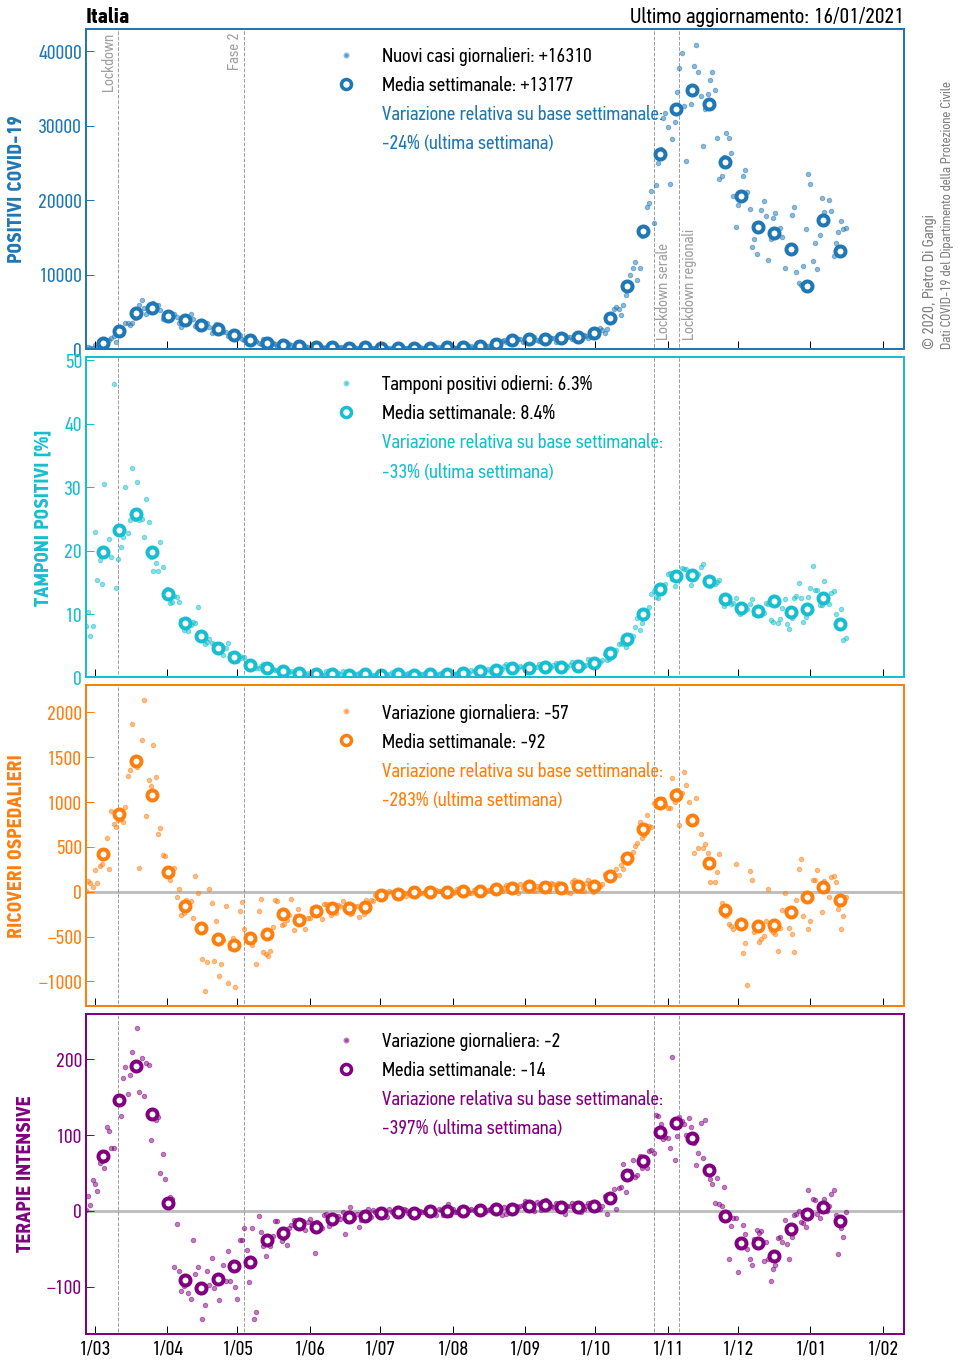

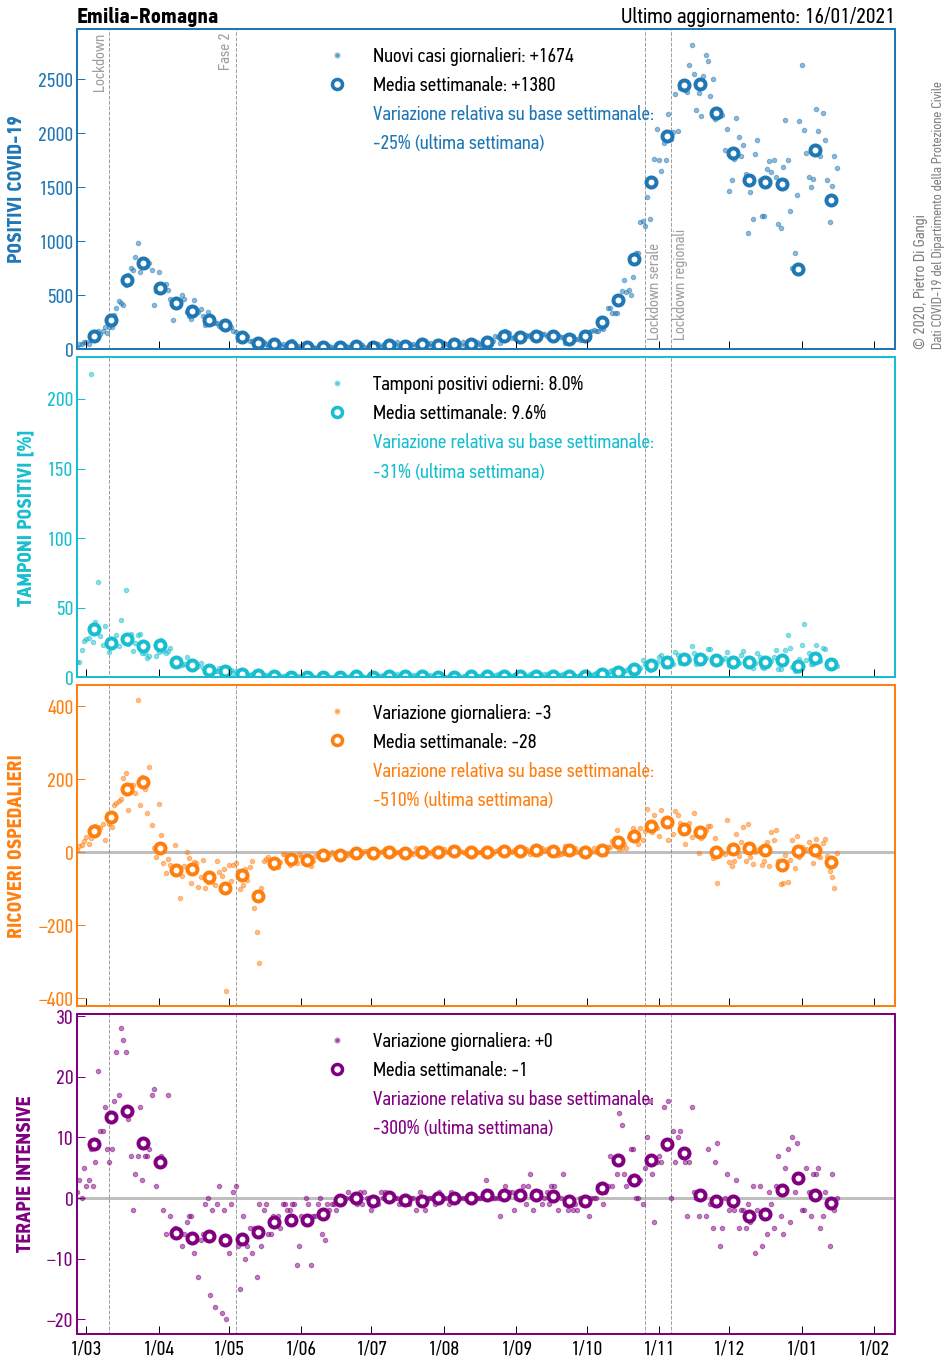

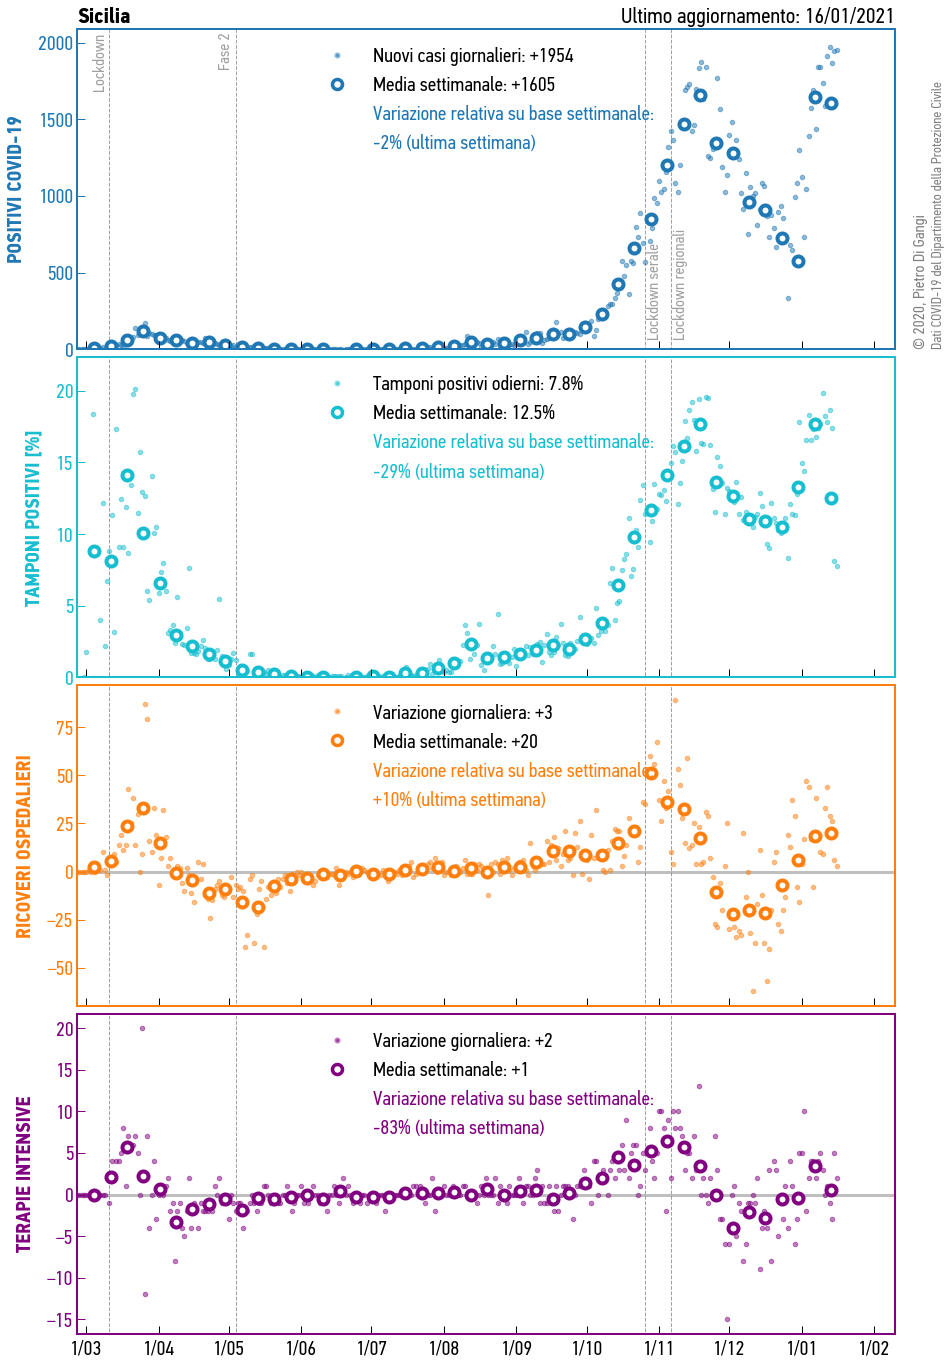

[None, None, None]

In [70]:
regions = ['Italia', 'Emilia-Romagna', 'Sicilia']
[plot_variations(region) for region in regions]

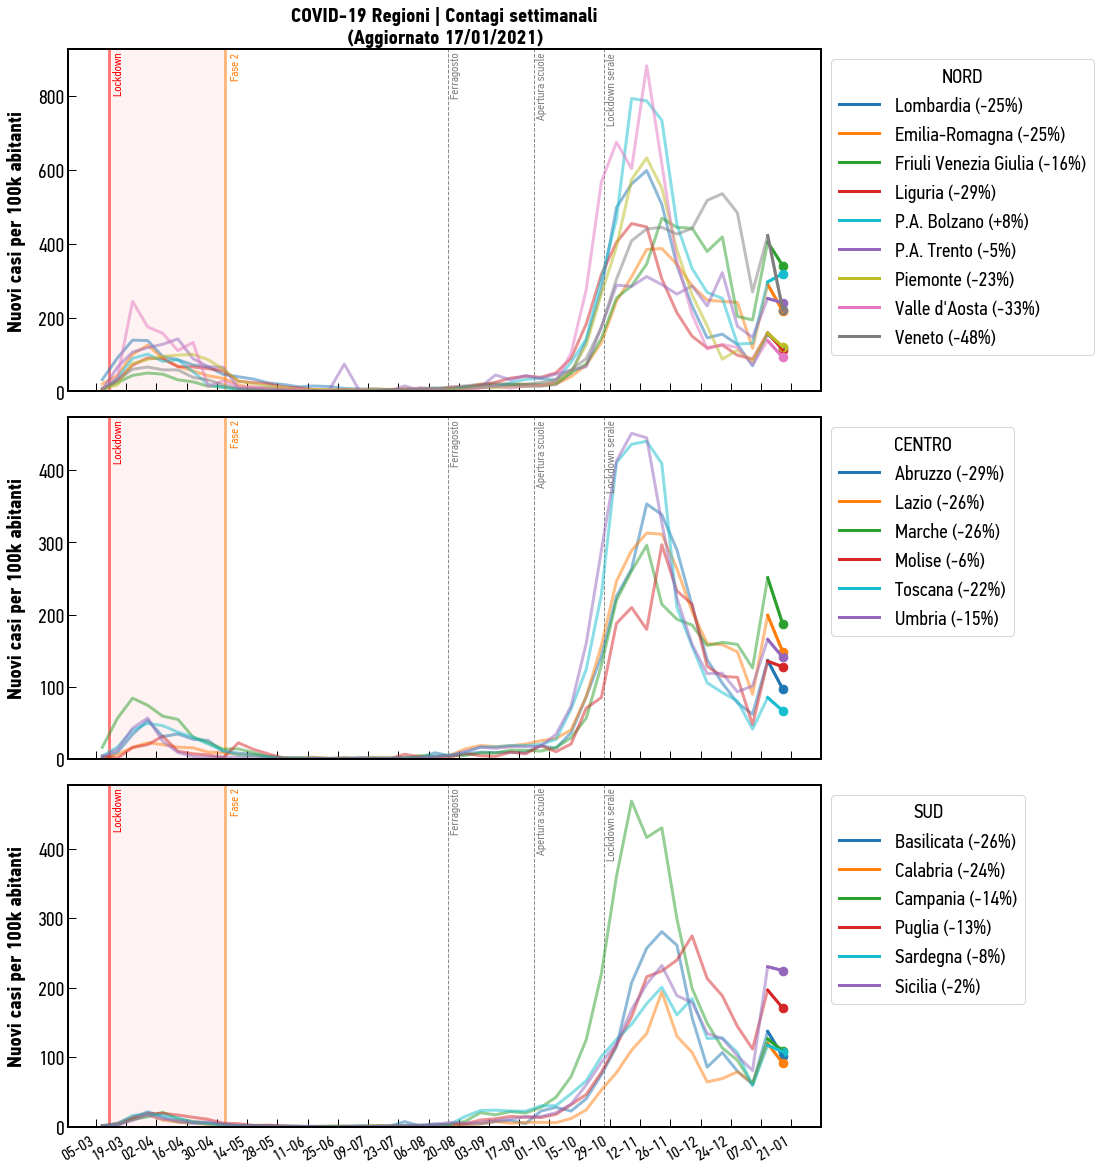

In [71]:
# figure
fig = plt.figure(figsize=(18,22))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 

colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple', 'tab:olive','tab:pink', 'tab:grey']
   
for i, reg in enumerate(nord):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.new_cases.iat[-2]-df.new_cases.iat[-3])/df.new_cases.iat[-3]*100
    ax.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label='', color=colors[i], alpha=0.5)
    ax.plot(df.date[-3:-1],df.new_cases_per100k[-3:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1)
    ax.scatter(df.date.iat[-2],df.new_cases_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    #ax.scatter(df.date.iat[-3],df.new_cases_per100k.iat[-3], label='', color=colors[i], marker='o', s=75, alpha=0.5)
    ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='NORD')
      
for i, reg in enumerate(centro):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.new_cases.iat[-2]-df.new_cases.iat[-3])/df.new_cases.iat[-3]*100
    ax2.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label='', color=colors[i], alpha=0.5)
    ax2.plot(df.date[-3:-1],df.new_cases_per100k[-3:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1)
    ax2.scatter(df.date.iat[-2],df.new_cases_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='CENTRO')
    
for i, reg in enumerate(sud):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.new_cases.iat[-2]-df.new_cases.iat[-3])/df.new_cases.iat[-3]*100
    ax3.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label='', color=colors[i], alpha=0.5)
    ax3.plot(df.date[-3:-1],df.new_cases_per100k[-3:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1)
    ax3.scatter(df.date.iat[-2],df.new_cases_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    #ax3.scatter(df.date.iat[-3],df.new_cases_per100k.iat[-3], label='', color=colors[i], marker='o', s=75, alpha=1)
    ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='SUD')

for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,10000, color='r', linestyles='-', alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,10000, color='tab:orange', linestyles='-', alpha=0.5)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,5,18),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,6,3),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.02)
    axx.text(datetime.datetime(2020,3,12,23), axx.get_ylim()[1], 'Lockdown ', va='top', ha='left', rotation=90, fontsize=12, color='r')
    axx.text(datetime.datetime(2020,5,5,23), axx.get_ylim()[1], 'Fase 2 ', va='top', ha='left', rotation=90, fontsize=12, color='tab:orange')
    axx.vlines(datetime.datetime(2020,8,15),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,8,15,23), axx.get_ylim()[1], 'Ferragosto ', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    #axx.vlines(datetime.datetime(2020,9,14),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    #axx.text(datetime.datetime(2020,9,14,23), axx.get_ylim()[1], 'Apertura scuole (14/09)', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.vlines(datetime.datetime(2020,9,24),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,9,24,23), axx.get_ylim()[1], 'Apertura scuole ', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.vlines(datetime.datetime(2020,10,26),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,10,26,23), axx.get_ylim()[1], 'Lockdown serale ', va='top', ha='left', rotation=90, fontsize=12, color='grey')

    
    axx.set_ylabel('Nuovi casi per 100k abitanti')
    axx.set_ylim(bottom=0)
    #for d in np.arange(0,1000,14):
        #axx.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

ax.set_title('COVID-19 Regioni | Contagi settimanali\n(Aggiornato %s)' % df.date.iat[-2].strftime('%-d/%m/%Y'), fontsize=20)

plt.show()

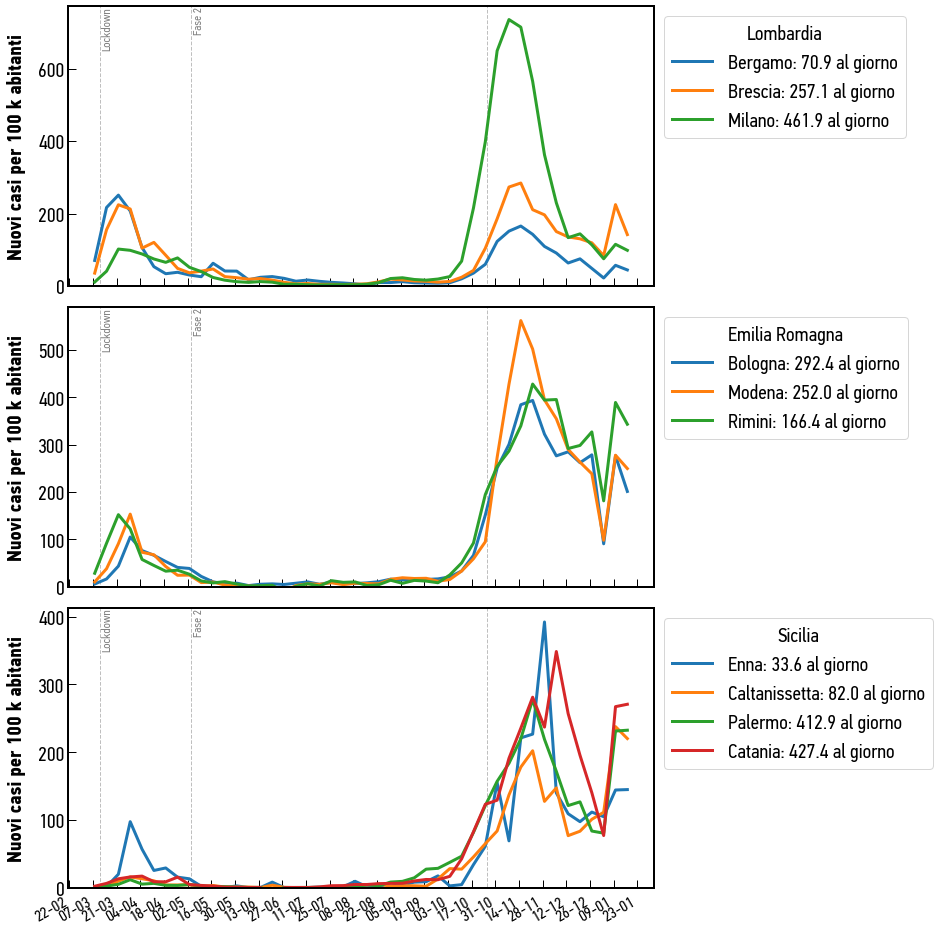

In [72]:
# figure
fig = plt.figure(figsize=(14,18))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 


province = ['Bergamo', 'Brescia', 'Milano']
for provincia in province:
    df=prov_weekly[prov_weekly.provincia==provincia]
    pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
    ax.plot(df.date[1:-1],df.new_cases[1:-1]/pop*1e5, label=provincia+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Lombardia')

province = ['Bologna', 'Modena', 'Rimini']
for provincia in province:
    df=prov_weekly[prov_weekly.provincia==provincia]
    pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
    ax2.plot(df.date[1:-1],df.new_cases[1:-1]/pop*1e5, label=provincia+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Emilia Romagna')

province = ['Enna', 'Caltanissetta', 'Palermo', 'Catania']
for provincia in province:
    df=prov_weekly[prov_weekly.provincia==provincia]
    pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
    ax3.plot(df.date[1:-1],df.new_cases[1:-1]/pop*1e5, label=provincia+': %.1f al giorno' % (df.new_cases.iat[-2]/7))
ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='Sicilia')


for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,100000, color='grey', linestyles='--', lw=1, alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,100000, color='grey', linestyles='--', lw=1, alpha=0.5)
    axx.vlines(datetime.date(2020,10,26),-1000,100000, color='grey', linestyles='--', lw=1, alpha=0.5)
    #axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,5,18),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,6,3),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.02)
    axx.text(datetime.date(2020,3,12), axx.get_ylim()[1], 'Lockdown', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.text(datetime.date(2020,5,5), axx.get_ylim()[1], 'Fase 2', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.set_ylabel('Nuovi casi per 100 k abitanti')
    axx.set_ylim(bottom=0)
    #for d in np.arange(0,1000,14):
    #    axx.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

#ax.set_title('COVID-19 Province | Contagi settimanali (%s)' % df.date.iat[-2].strftime('%-d/%m/%Y'))

plt.show()

In [73]:
import matplotlib.colors as mcolors

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

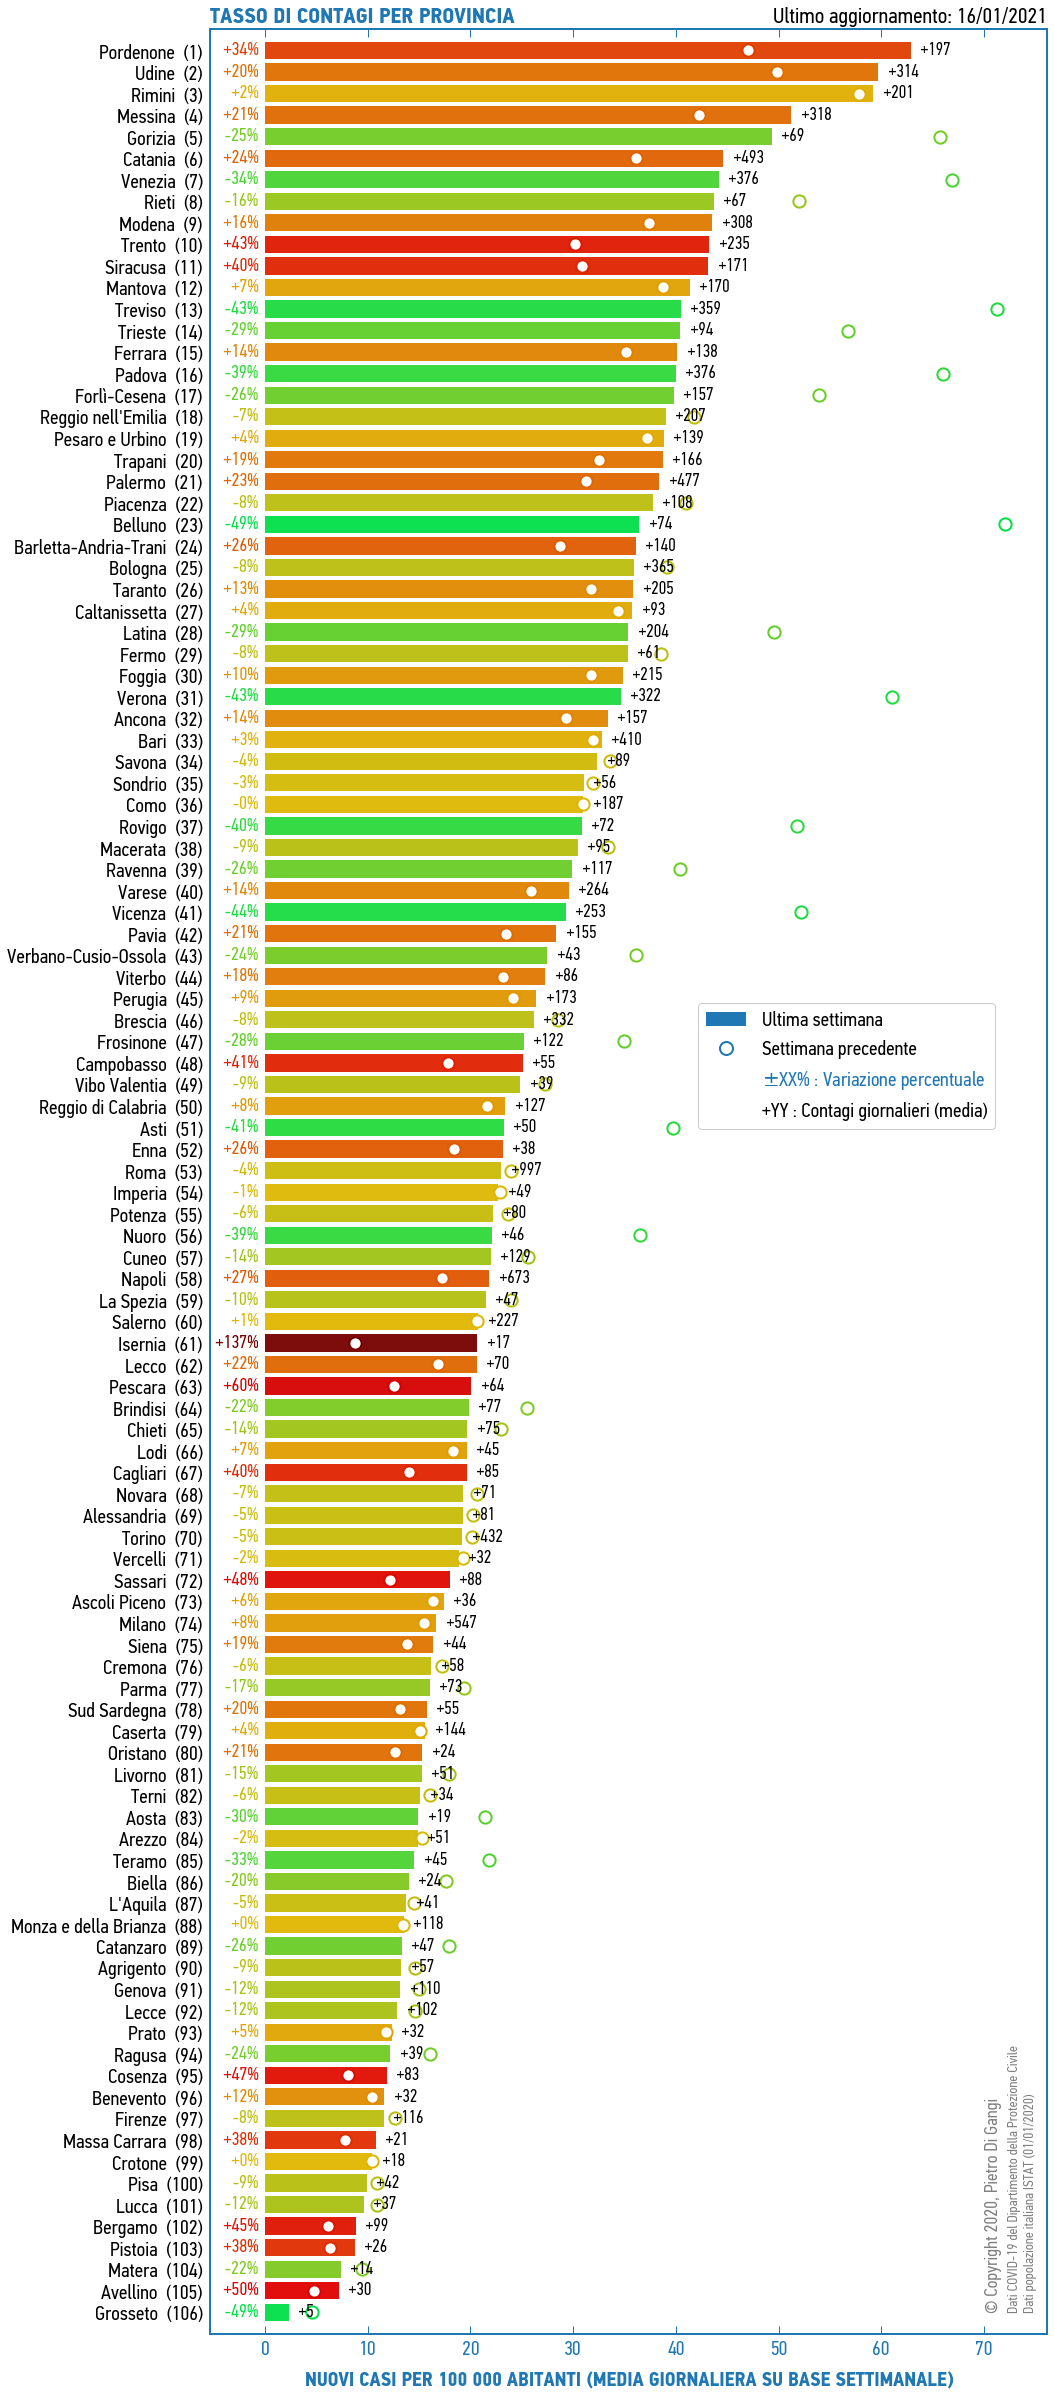

In [74]:
def standing_lastweek_province(title='', color='darkcyan', bottom=False):
    
    # dataframe
    df_week = pd.DataFrame(columns=['cases_per100k', 'cases_per100k_prev', 'cases', 'cases_prev', 'population'])
    province = list(popdf.Province.unique())
    province.remove('Bolzano')
    
    for provincia in province:
        df = prov[prov.provincia==provincia]
        pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
        cases = 0
        cases_prev = 0
        for i in np.arange(-7,0):
            cases = cases + df['new_cases'].iat[i]
        for i in np.arange(-14,-7):
            cases_prev = cases_prev + df['new_cases'].iat[i]
        df_week.loc[provincia] = pd.Series({'cases_per100k':cases/pop*1e5, 'cases_per100k_prev':cases_prev/pop*1e5, 'cases':cases,  'cases_prev':cases_prev, 'population':pop})

    df_week = df_week.sort_values('cases_per100k', ascending=False)
    

    # plot
    #data = df_week
    
    totmax = df_week['cases_per100k'].iat[0]/7  
    province = df_week.index
    province = province[:109]
    province = province[::-1]

    n = len(province)*0.1
    fig = plt.figure(figsize=(15,4*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    ax.tick_params(top=True) 
    
    # set a color map
    df_week['var'] = (df_week['cases_per100k']-df_week['cases_per100k_prev'])/df_week['cases_per100k_prev']
    minimum = -0.5 #min(df_week['var'])
    maximum = 1.5 #max(df_week['var'])
    norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
    #mapper = cm.ScalarMappable(norm=norm, cmap=cm.cool)
    mapper = cm.ScalarMappable(norm=norm, 
                               cmap=get_continuous_cmap(hex_list=[
                                   '#00E148','#E1B800','#E10000','#AF0000','#640000' #RED
                                   #'#17E31D','#DBD100','#EBCF1E','#DC1B1B','#000000'
                               ]))
    

    for i,provincia in enumerate(province):
        df = df_week[df_week.index==provincia]
        #pop = data.population.iat[0]
        #tot = df[var].iat[-1]
        ylab = provincia+'  (%d) ' % -(i-len(province))
        ax.barh(ylab, df['cases_per100k']/7, color=mapper.to_rgba(df['var']), label='', height=0.8, alpha=0.95)
        xval = df['cases_per100k']/7
        
        ax.scatter(df['cases_per100k_prev']/7, ylab, facecolor='w', edgecolor=mapper.to_rgba(df['var']), marker='o', s=150, lw=2, label='', zorder=100)
        
        lb = ' +%.0f' % (df['cases']/7)
        ax.text(df['cases_per100k']/7 + 0.01*totmax, ylab, lb, ha='left', va='center', color='k', fontsize=17, zorder=200)
        
        
        var = ((df['cases']-df['cases_prev'])/df['cases_prev'])[0]
        if var<=0.:
            col = 'tab:green'
        elif (var>0.) & (var<=0.50):
            col = 'tab:orange'
        elif (var>0.50) & (var<=1.):
            col = 'red'
        elif (var>1.) & (var<=2.):
            col = 'darkred'
        else: col = 'black'
        lb = '  %+.0f%s' % ( var*100, '%' )
        ax.text(-0.01*totmax, ylab, lb, color=mapper.to_rgba(var), ha='right', va='center', fontsize=18, fontweight='100', alpha=1, zorder=200)


    # labels and axes limits
    col = 'tab:blue'
    color_frame(ax, col)
    ax.set_title('Ultimo aggiornamento: %s' % (lastday.strftime('%-d/%m/%Y')), fontweight='100', loc='right')
    ax.set_title('TASSO DI CONTAGI PER PROVINCIA', color=col, fontweight='900', loc='left')
    ax.set_xlabel('NUOVI CASI PER 100 000 ABITANTI (MEDIA GIORNALIERA SU BASE SETTIMANALE)', color=col)
    ax.tick_params(axis='x', which='major', colors=col)
    #ax.tick_params(axis='y', labelsize=14)
    xmax = ax.get_xlim()[1]*1.0
    ax.set_xlim(-0.07*xmax,xmax)

    ylim = ax.get_ylim()
    ax.set_ylim((-1,106))
    
    #df = df_week[df_week.index=='Enna']
    #ylab = 'Enna  (%d) ' % -(i-len(province))
    #ax.barh(ylab, [-100,ax.get_xlim()[1]], facecolor='w', edgecolor='tab:blue', lw=2, label='', height=1, zorder=-1000)
            
    #legend
    legend_elements = [
        Patch(facecolor='tab:blue', label='Ultima settimana'),
        Line2D([0], [0], label='Settimana precedente', marker='o', markersize=13, markeredgecolor='tab:blue', color='w', markeredgewidth=2, linewidth=0,),
        Line2D([0], [0], markersize=0, color='tab:blue', linestyle='None', label=r'$\pm$XX%s : Variazione percentuale' % '%'),
        Line2D([0], [0], markersize=0, color='k', linestyle='None', label='+YY : Contagi giornalieri (media)'),
    ]
    leg = plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(0.95,0.55), frameon=True, facecolor='white', framealpha=1)
    for h, t in zip(leg.legendHandles[2:], leg.get_texts()[2:]):
        t.set_color(h.get_color())
    
    #plt.title(title+'%s - %s' % ((lastday-timedelta(days=7)).strftime('%-d/%m'), lastday.strftime('%-d/%m')), fontsize=20, y=1.0)

    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(0.92*xmax, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=18)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(0.95*xmax, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati popolazione italiana ISTAT (01/01/2020)'
    plt.text(0.97*xmax, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    

    
    plt.show()

    
standing_lastweek_province('Covid-19 Province | Nuovi casi (media settimanale) |  ', color='darkcyan')

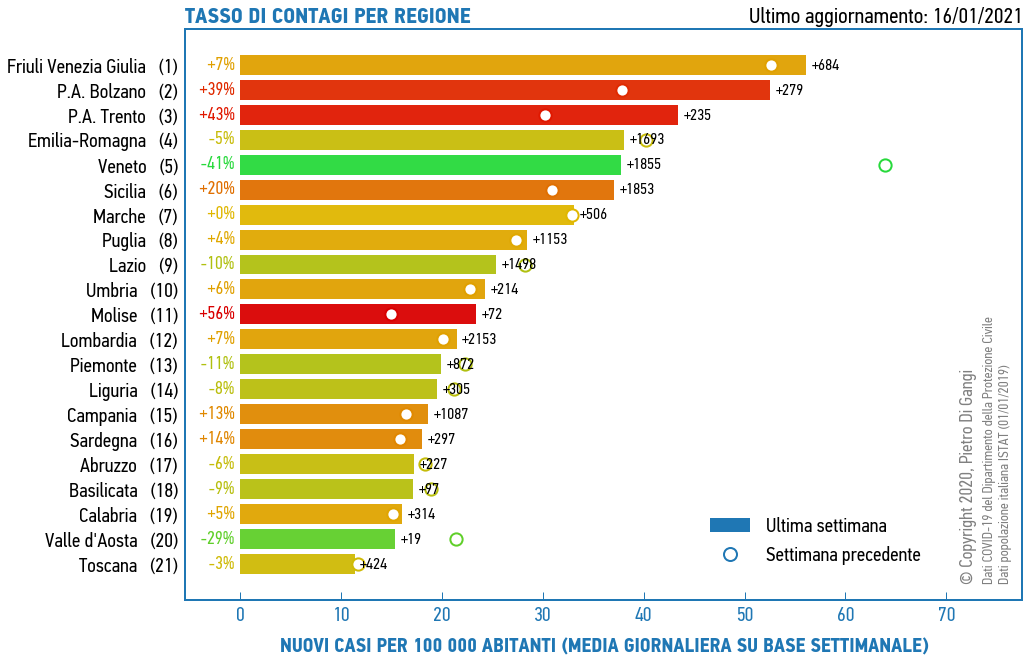

In [75]:
def standing_lastweek_regioni(title='', color='darkcyan', bottom=False):
    
    # dataframe
    df_week = pd.DataFrame(columns=['cases_per100k', 'cases_per100k_prev', 'cases', 'cases_prev'])
    regioni = list(ita.region.unique())
    regioni.remove('Italia')
    regioni.remove('Nord')
    regioni.remove('Centro')
    regioni.remove('Sud')
    
    for reg in regioni:
        df = ita[ita.region==reg]
        #pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
        cases_per100k = 0
        cases_per100k_prev = 0
        cases = 0
        for i in np.arange(-7,0):
            cases_per100k = cases_per100k + df['new_cases_per100k'].iat[i]
            cases = cases + df['new_cases'].iat[i]
        for i in np.arange(-14,-7):
            cases_per100k_prev = cases_per100k_prev + df['new_cases_per100k'].iat[i]
        df_week.loc[reg] = pd.Series({'cases_per100k':cases_per100k, 'cases_per100k_prev':cases_per100k_prev, 'cases':cases})

    df_week = df_week.sort_values('cases_per100k', ascending=False)
    

    # plot
    #data = df_week
    
    totmax = df_week['cases_per100k'].iat[0]/7  
    regioni = df_week.index
    regioni = regioni[::-1]

    n = len(regioni)*0.1
    fig = plt.figure(figsize=(15,5*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    
    # set a color map
    df_week['var'] = (df_week['cases_per100k']-df_week['cases_per100k_prev'])/df_week['cases_per100k_prev']
    minimum = -0.5 #min(df_week['var'])
    maximum = 1.5 #max(df_week['var'])
    norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
    #mapper = cm.ScalarMappable(norm=norm, cmap=cm.cool)
    mapper = cm.ScalarMappable(norm=norm, 
                               cmap=get_continuous_cmap(hex_list=[
                                   '#00E148','#E1B800','#E10000','#AF0000','#640000' #RED
                                   #'#17E31D','#DBD100','#EBCF1E','#DC1B1B','#000000'
                               ]))


    for i,reg in enumerate(regioni):
        df = df_week[df_week.index==reg]
        #pop = data.population.iat[0]
        #tot = df[var].iat[-1]
        ylab = reg+'   (%d) ' % -(i-len(regioni))
        ax.barh(ylab, df['cases_per100k']/7, color=mapper.to_rgba(df['var']), label='', height=0.8, alpha=0.95)
        
        ax.scatter(df['cases_per100k_prev']/7, ylab, facecolor='w', edgecolor=mapper.to_rgba(df['var']), marker='o', s=150, lw=2, label='', zorder=100)
        
        lb = '+%.0f' % (df['cases']/7)
        ax.text(df['cases_per100k']/7 + 0.01*totmax, ylab, lb, ha='left', va='center', fontsize=16, zorder=200)
        
        
        var = ((df['cases_per100k']-df['cases_per100k_prev'])/df['cases_per100k_prev'])[0]
        if var<=0.:
            col = 'tab:green'
        elif (var>0.) & (var<=0.50):
            col = 'tab:orange'
        elif (var>0.50) & (var<=1.):
            col = 'red'
        elif (var>1.) & (var<=2.):
            col = 'darkred'
        else: col = 'black'
        lb = '  %+.0f%s' % ( var*100, '%' )
        ax.text(-0.01*totmax, ylab, lb, color=mapper.to_rgba(var), ha='right', va='center', fontsize=18, fontweight='100', alpha=1, zorder=200)
        
    # labels and axes limits
    ax.set_xlabel('NUOVI CASI PER 100 000 ABITANTI (MEDIA GIORNALIERA SU BASE SETTIMANALE)', color='tab:blue')
    ax.tick_params(axis='x', which='major', colors='tab:blue')
    ax.tick_params(axis='y', which='major')
    xmax = ax.get_xlim()[1]*1.15
    ax.set_xlim(-0.07*xmax,xmax)

    #legend
    legend_elements = [
        Patch(facecolor='tab:blue', label='Ultima settimana'),
        Line2D([0], [0], label='Settimana precedente', marker='o', markersize=13, markeredgecolor='tab:blue', color='w', markeredgewidth=2, linewidth=0,),
    ]
    ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.9,0.03), frameon=False)
    
    
    #plt.title(title+'%s - %s' % ((lastday-timedelta(days=7)).strftime('%-d/%m'), lastday.strftime('%-d/%m')), fontsize=20, y=1.02)
    
    color_frame(ax, 'tab:blue')
    ax.set_title('Ultimo aggiornamento: %s' % (lastday.strftime('%-d/%m/%Y')), fontweight='100', loc='right')
    ax.set_title('TASSO DI CONTAGI PER REGIONE', color='tab:blue', fontweight='900', loc='left')
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(0.92*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=18)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(0.95*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati popolazione italiana ISTAT (01/01/2019)'
    plt.text(0.97*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

    plt.show()

    
standing_lastweek_regioni('Covid-19 Regioni | Nuovi casi (media giornaliera) |  ', color='c')
#standing_lastweek_province('Covid-19 Province | Nuovi casi (media settimanale) |  ', color='darkcyan', bottom=True)

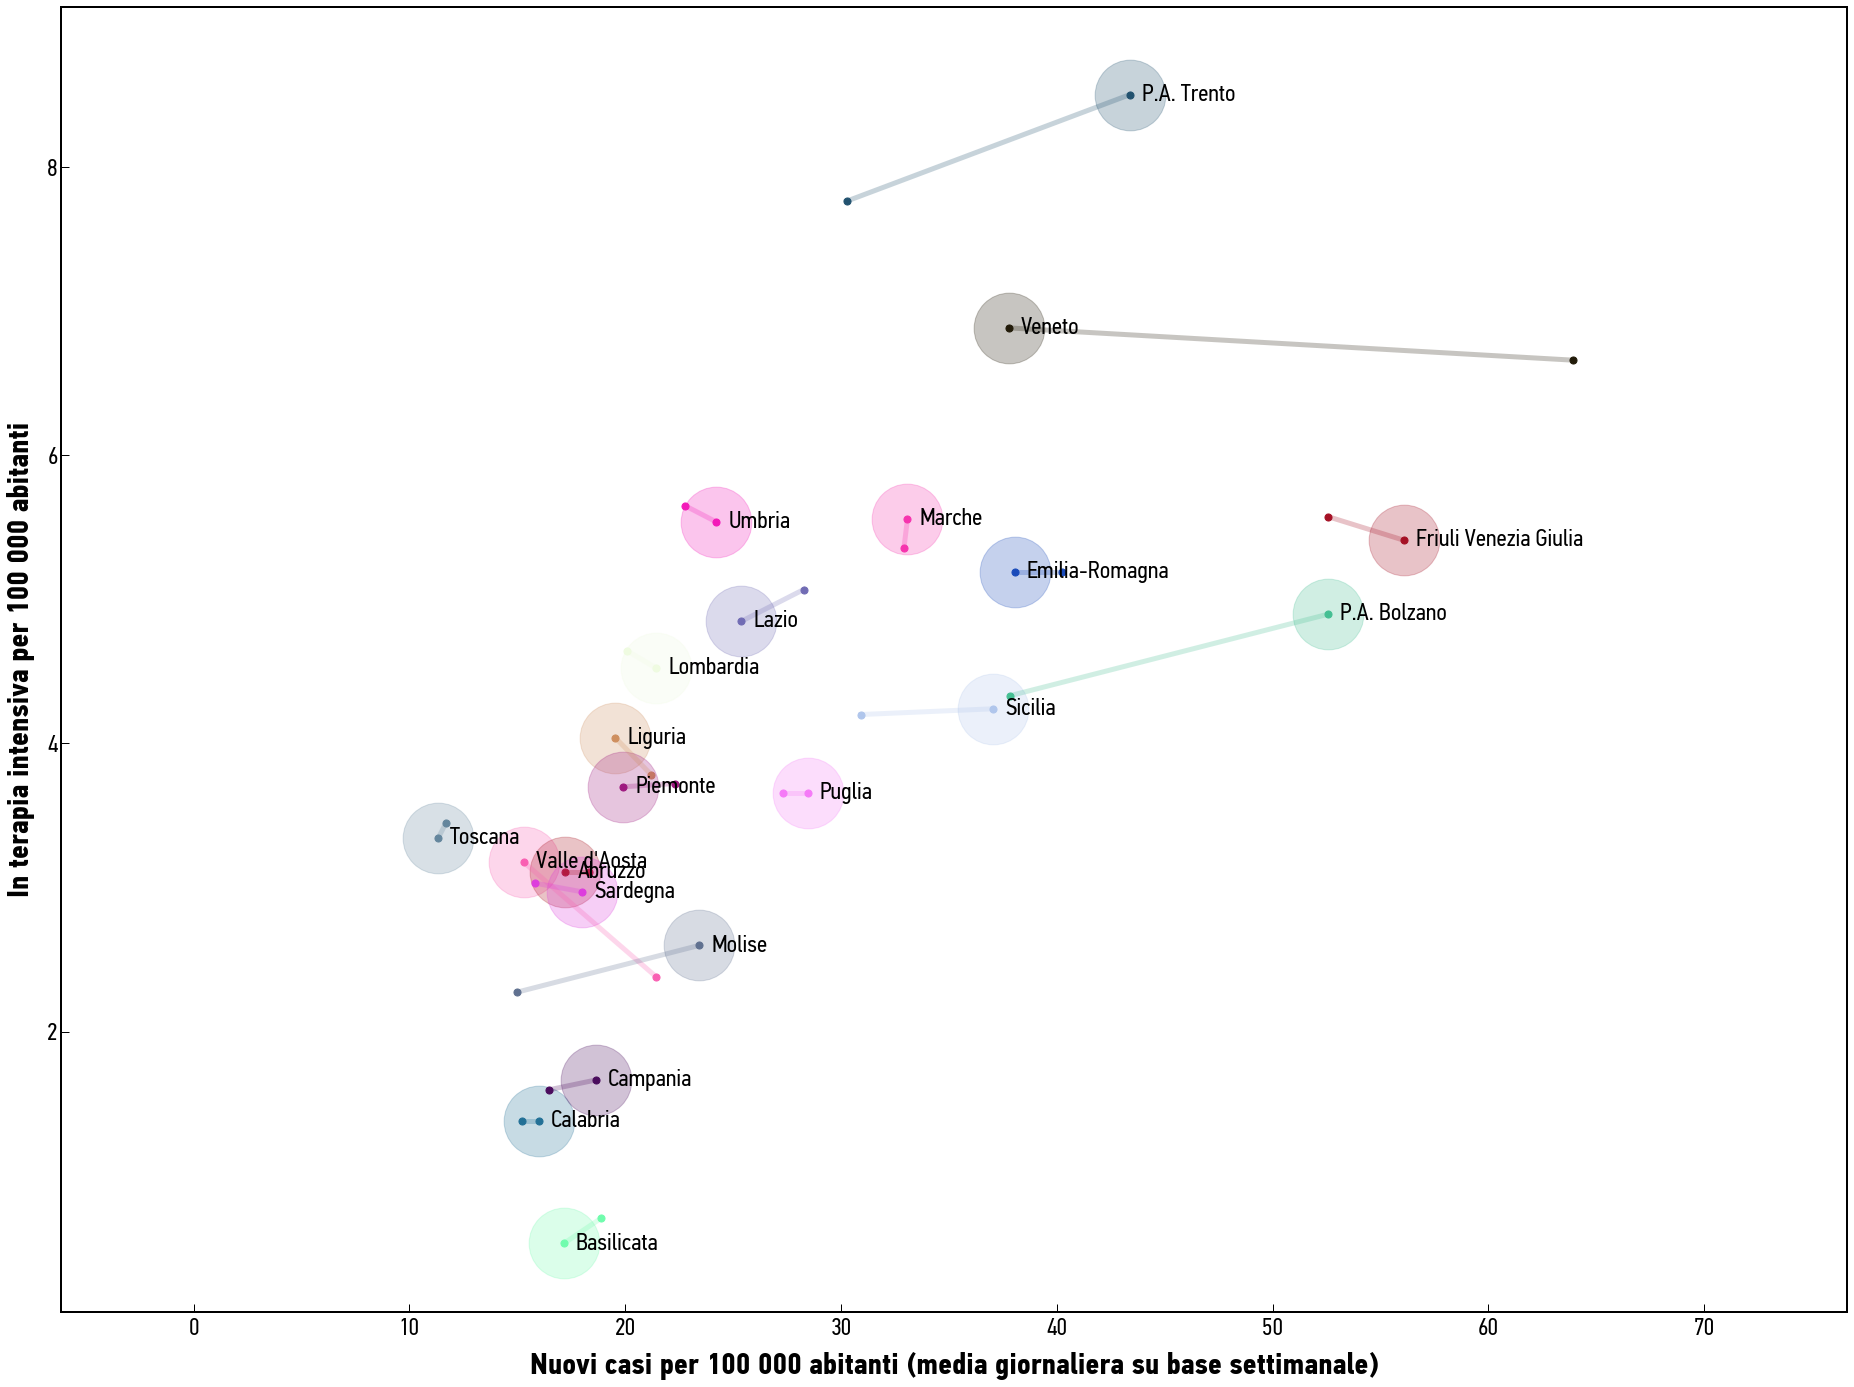

In [76]:
from random import randint


# dataframe
df_week = pd.DataFrame(columns=['cases_per100k', 'cases_per100k_prev', 'cases', 'cases_prev'])
regioni = list(ita.region.unique())
regioni.remove('Italia')
regioni.remove('Nord')
regioni.remove('Centro')
regioni.remove('Sud')

color = []
n = len(regioni)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

for reg in regioni:
    df = ita[ita.region==reg]
    #pop = popdf[popdf.Province==provincia].Popolazione.iat[0]
    cases_per100k = 0
    cases_per100k_prev = 0
    cases = 0
    for i in np.arange(-7,0):
        cases_per100k = cases_per100k + df['new_cases_per100k'].iat[i]
        cases = cases + df['new_cases'].iat[i]
    for i in np.arange(-14,-7):
        cases_per100k_prev = cases_per100k_prev + df['new_cases_per100k'].iat[i]
    df_week.loc[reg] = pd.Series({'cases_per100k':cases_per100k, 'cases_per100k_prev':cases_per100k_prev, 'cases':cases})

df_week = df_week.sort_values('cases_per100k', ascending=False)

# plot
#data = df_week

totmax_x = df_week['cases_per100k'].iat[0]/7 
#totmax_y = df['terapia_intensiva_per100k'].iat[0]
regioni = df_week.index
regioni = regioni[::-1]


fig = plt.figure(figsize=(32,24))
ax = fig.add_subplot(111)

# set a color map
df_week['var'] = (df_week['cases_per100k']-df_week['cases_per100k_prev'])/df_week['cases_per100k_prev']
minimum = -0.5 #min(df_week['var'])
maximum = 1.5 #max(df_week['var'])
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.cool)
mapper = cm.ScalarMappable(norm=norm, 
                           cmap=get_continuous_cmap(hex_list=['#17E31D','#DBD100','#EBCF1E','#DC1B1B','#000000']))


for i,reg in enumerate(regioni):
    df_cases = df_week[df_week.index==reg]
    df_ti = ita[ita.region==reg]
    #pop = data.population.iat[0]
    #tot = df[var].iat[-1]
    ylab = reg+' - %d ' % -(i-len(regioni))
    #print(reg, df_cases['cases_per100k'].iat[0]/7, df_ti['terapia_intensiva_per100k'].iat[-1])
    ax.scatter(df_cases['cases_per100k'].iat[0]/7, df_ti['terapia_intensiva_per100k'].iat[-1], 
               color=color[i],marker='.', s=20000, label='', alpha=0.25, zorder=100)
    ax.scatter(df_cases['cases_per100k'].iat[0]/7, df_ti['terapia_intensiva_per100k'].iat[-1], 
               color=color[i],marker='.', s=200, label='', alpha=1, zorder=100)
    ax.scatter(df_cases['cases_per100k_prev'].iat[0]/7, df_ti['terapia_intensiva_per100k'].iat[-2], 
               color=color[i],marker='.', s=200, label='', alpha=1, zorder=100)
    ax.plot([df_cases['cases_per100k_prev'].iat[0]/7,df_cases['cases_per100k'].iat[0]/7], [df_ti['terapia_intensiva_per100k'].iat[-2],df_ti['terapia_intensiva_per100k'].iat[-1]], 
               color=color[i], label='', lw=5, alpha=0.25, zorder=100)
    
    lb = reg
    ax.text(0.01*totmax_x + df_cases['cases_per100k'].iat[0]/7, df_ti['terapia_intensiva_per100k'].iat[-1], lb, ha='left', va='center', fontsize=24, zorder=200)


    #var = ((df['cases_per100k']-df['cases_per100k_prev'])/df['cases_per100k_prev'])[0]
    #ax.text(0, ylab, lb, color=mapper.to_rgba(var), ha='right', va='center', fontsize=12, alpha=1, zorder=200)

    
    
# labels and axes limits
plt.xlabel('Nuovi casi per 100 000 abitanti (media giornaliera su base settimanale)', fontsize=30)
plt.ylabel('In terapia intensiva per 100 000 abitanti', fontsize=30)
ax.tick_params(axis='x', which='major', labelsize=24)
ax.tick_params(axis='y', which='major', labelsize=24)
xmax = ax.get_xlim()[1]*1.15
ax.set_xlim(-0.08*xmax,xmax)


#legend
#legend_elements = [
#    Patch(facecolor='black', label='Ultimi 7 giorni'),
#    Line2D([0], [0], marker='.', color='w', label='Settimana precedente', markerfacecolor='#E4E4E4', markersize=35),
#]
#ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.9,0.03))


#plt.title(title+'%s - %s %s' % ((lastday-timedelta(days=7)).strftime('%-d/%m'), lastday.strftime('%-d/%m'), lastday.strftime('%Y')), fontsize=20, y=1.02)

# disclaimer
#text = '© Copyright 2020, Pietro Di Gangi'
#plt.text(0.92*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
#text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
#plt.text(0.95*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
#text = 'Dati popolazione italiana ISTAT (01/01/2019)'
#plt.text(0.97*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

plt.show()

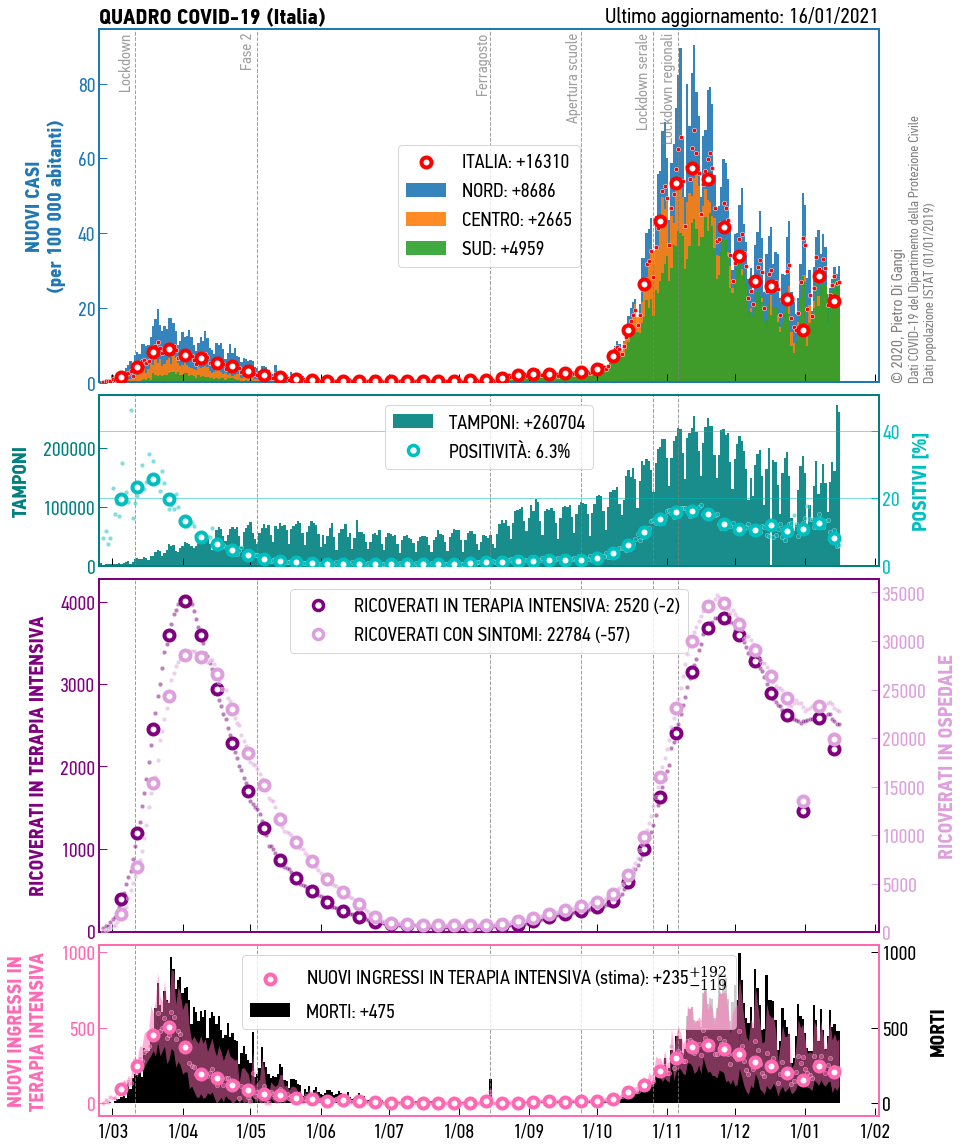

In [77]:
regions = ['Nord', 'Centro', 'Sud','Italia']
var = 'new_cases'
cumvar = var.replace("new_", "")
title = 'Covid-19 Italia | Aggiornamento %s' % lastday.strftime('%-d %b %Y') 
ylabel = 'Casi giornalieri per 100 000 abitanti'

day0 = datetime.datetime(2020,2,24) #phase2_date



# figure
fig = plt.figure(figsize=(22,20))
grid = plt.GridSpec(6, 3, hspace=0.075, wspace=0.35)
ax = fig.add_subplot(grid[0:2, 1:])
ax1 = fig.add_subplot(grid[2, 1:], sharex=ax)
ax2 = fig.add_subplot(grid[3:5, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[5, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax1.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 

    
data = ita[ita.date>=day0]
#ax.set_title(title , fontsize=24, y=1.01)

from scipy.signal import savgol_filter

# ax (contagi)
col = 'tab:blue'
color_frame(ax, col)
set_yaxis(ax, 'NUOVI CASI\n(per 100 000 abitanti)', col)

ymax=0
for i,reg in enumerate(regions):
    df = data[data.region==reg]
    pop = df['population'].iat[0]        
    tot = df[var].iat[-1]
    cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
    lb = '%s: %+.f' % (reg.upper(), tot)
    if reg=='Italia':
        ax.scatter(df.date[2:], df['new_cases_per100k'][2:], color='r', edgecolor='w', lw=0.5, alpha=0.95, s=20, label='', zorder=400)
        #ax.plot(df.date, df[var]/pop*1e5, label=lb, alpha=1, color='r', lw=3, ls='-', path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
        #cases_smoothed = savgol_filter(df[var]/pop*1e5, 75, 3) # window size 51, polynomial order 3
        #ax.plot(df.date, cases_smoothed, label=lb, color='g', lw=3, ls='-', path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
        df_weekly=ita_weekly[ita_weekly.region=='Italia']
        ax.scatter(df_weekly.date[1:-1]-timedelta(days=3, hours=12), df_weekly['new_cases_per100k'][1:-1]/7, 
               edgecolor='r', color='w', linestyle='-', linewidth=4, marker='o', s=100, label=lb, zorder=500)
        #ax.plot(df_weekly.date[0:-1]-timedelta(days=3,hours=12), df_weekly[var][0:-1]/pop*1e5/7, label='', alpha=0.95, color='black', lw=2, ls='--', path_effects=[pe.Stroke(linewidth=4, foreground='white'), pe.Normal()])

    else:
        ax.bar(df.date, df[var]/pop*1e5, width=1, label=lb, alpha=0.9)
        max_ = np.max(df[var]/pop*1e5)
        ymax = np.max([ymax, max_])

ax.set_xlim(left = day0)
ymax = ymax*1.05
ax.set_ylim(0.01, ymax)

leg = ax.legend(loc='center') 
leg._legend_box.align = "left"

# ax1 (tamponi)
ax1_ = ax1.twinx()
col = 'c'
ax1_.set_ylabel('POSITIVI [%]', color=col)
ax1_.tick_params(colors=col)
ax1_.grid(axis='y', linewidth=1, alpha=0.5, color=col, ls='-', which='both')

var = 'new_tests'
cumvar = var.replace("new_", "")
tot = df[var].iat[-1]
lb1 = 'TAMPONI: %+d' % (df[var].iat[-1])
b1 = ax1.bar(df.date, df[var], label=lb1, width=1, color='teal', alpha=0.9)

lb3 = 'POSITIVITÀ: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
ax1_.scatter(df.date[2:],  df['new_cases'][2:]/df['new_tests'][2:]*100, color=col, edgecolor='w', lw=0.5, alpha=0.5, s=20, label=lb3, zorder=400)
ax1_.scatter(df_weekly.date[1:-1]-timedelta(days=3, hours=12), df_weekly['new_cases'][1:-1]/df_weekly['new_tests'][1:-1]*100, 
               edgecolor=col, color='w', linestyle='-', linewidth=4, marker='o', s=100, label=lb, zorder=500)
       
#l, = ax1_.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=2, markersize=5)

handles = [b1,
           Line2D([0], [0], marker='o', markersize=10, markeredgecolor=col, color='w', markeredgewidth=3.5, linewidth=0, label=lb3),
            ]
labels = [lb1, lb3]
ax1_.legend(handles, labels, loc='upper center')
ax1.set_ylim(0)
ax1_.set_ylim(0)

col = 'teal'
color_frame(ax1_, col)
set_yaxis(ax1, 'TAMPONI', col)

# ax2 (ricoveri)
ax2_ = ax2.twinx()



#ax2_.hlines(0.3*6750,day0, day0+timedelta(days=1000), color='purple', linestyles='--', linewidth=1, alpha=0.9)
#ax2_.text(phase2_date+timedelta(days=5), 0.3*6750*0.98, 'Livello di allerta | 30% posti in terapia intensiva occupati', color='purple',
#        fontsize=12, va='top')
col = 'plum'
set_yaxis(ax2_, 'RICOVERATI IN OSPEDALE', col)
ax2_.scatter(df.date[2:],  df['ricoverati_con_sintomi'][2:], color=col, edgecolor='w', lw=0.5, alpha=0.5, s=20, label=lb3, zorder=200)
ax2_.scatter(df_weekly.date[1:-1]-timedelta(days=3, hours=12), df_weekly['ricoverati_con_sintomi'][1:-1]/7, 
               edgecolor=col, color='w', linestyle='-', linewidth=4, marker='o', s=100, label=lb, zorder=300)
#l2, = ax2.plot(df.date, df.ricoverati_con_sintomi, color='orange', lw=3, alpha=0.99, label='Attuali ricoverati con sintomi: %d' % df.ricoverati_con_sintomi.iat[-1], zorder=-10000)
lb2 = 'RICOVERATI CON SINTOMI: %d (%+d)' % (df.ricoverati_con_sintomi.iat[-1], df.new_ricoverati_con_sintomi.iat[-1])

col = 'purple'
color_frame(ax2_, col)
set_yaxis(ax2, 'RICOVERATI IN TERAPIA INTENSIVA', col)
ax2.scatter(df.date[2:],  df['terapia_intensiva'][2:], color=col, edgecolor='w', lw=0.5, alpha=0.5, s=20, label=lb3, zorder=400)
ax2.scatter(df_weekly.date[1:-1]-timedelta(days=3, hours=12), df_weekly['terapia_intensiva'][1:-1]/7, 
               edgecolor=col, color='w', linestyle='-', linewidth=4, marker='o', s=100, label=lb, zorder=500)
#l1, = ax2_.plot(df.date, df.terapia_intensiva, color='purple', lw=3, alpha=0.99, label='Attuali ricoverati in terapia intensiva: %d' % df.terapia_intensiva.iat[-1], zorder=500000)
lb1 = 'RICOVERATI IN TERAPIA INTENSIVA: %d (%+d)' % (df.terapia_intensiva.iat[-1], df.new_terapia_intensiva.iat[-1])



_, maxy = ax2_.get_ylim()
ax2_.set_ylim(-20)
ax2.set_ylim(bottom=-20)

handles = [Line2D([0], [0], marker='o', markersize=10, markeredgecolor='purple', color='w', markeredgewidth=3.5, linewidth=0),
           Line2D([0], [0], marker='o', markersize=10, markeredgecolor='plum', color='w', markeredgewidth=3.5, linewidth=0),
]
#handles = [l2, l1]
labels = [lb1, lb2]
ax2_.legend(handles, labels, loc='upper center')




# ax3 (variazione ricoveri)
ax3_ = ax3.twinx()

col = 'hotpink'
set_yaxis(ax3, 'NUOVI INGRESSI IN\nTERAPIA INTENSIVA', col)
color_frame(ax3_, col)

ax3.bar(df.date, df.new_deaths, width=1, color='k', label='MORTI: %+d' % df.new_deaths.iat[-1])

label='NUOVI INGRESSI IN TERAPIA INTENSIVA (stima): %+d$^{+%.0f}_{-%.0f}$' % (df.new_terapia_intensiva_netta.iat[-1],
                                                                                        df.new_terapia_intensiva_netta_max.iat[-1] - df.new_terapia_intensiva_netta.iat[-1],
                                                                                        df.new_terapia_intensiva_netta.iat[-1] - df.new_terapia_intensiva_netta_min.iat[-1],
                                                                                       )
ax3.scatter(df.date[2:],  df['new_terapia_intensiva_netta'][2:], color=col, edgecolor='w', lw=0.5, alpha=0.5, s=20, label='', zorder=400)
ax3.scatter(df_weekly.date[1:-1]-timedelta(days=3, hours=12), df_weekly['new_terapia_intensiva_netta'][1:-1]/7, 
               edgecolor=col, color='w', linestyle='-', linewidth=4, marker='o', s=100, label=label, zorder=500)
ax3.fill_between(df.date, df.new_terapia_intensiva_netta_max, df.new_terapia_intensiva_netta, lw=0, zorder=100, alpha=0.5, color=col)
ax3.fill_between(df.date, df.new_terapia_intensiva_netta_min, df.new_terapia_intensiva_netta, lw=0, zorder=100, alpha=0.5, color=col)

ax3_.set_ylim(ax3.get_ylim())
ax3_.set_ylabel('MORTI')

ax3.legend(loc='upper center')


for axx in [ax,ax1,ax2,ax3]:
    axx.autoscale(False)
    alpha=0.75
    axx.vlines(datetime.datetime(2020,3,11),-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
    axx.vlines(phase2_date,-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
    axx.vlines(datetime.datetime(2020,8,15),-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
    axx.vlines(datetime.datetime(2020,9,24),-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
    axx.vlines(datetime.datetime(2020,10,26),-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
    axx.vlines(datetime.datetime(2020,11,6),-100,1e6, color='grey', linestyles='--', linewidth=1, alpha=alpha)
 
ymax = ax.get_ylim()[1]
xoffset = timedelta(days=1)
txtargs={'color':'grey', 'fontsize':16, 'rotation':90, 'va':'top', 'ha':'right', 'alpha':0.75}
ax.text(datetime.datetime(2020,3,11)-xoffset, ymax*0.99, 'Lockdown', **txtargs)
ax.text(phase2_date-xoffset, ymax*0.99, 'Fase 2', **txtargs)
ax.text(datetime.datetime(2020,8,15), ymax*0.99, 'Ferragosto', **txtargs)
ax.text(datetime.datetime(2020,9,24), ymax*0.99, 'Apertura scuole', **txtargs)
ax.text(datetime.datetime(2020,10,26)-xoffset, ymax*0.99, 'Lockdown serale', **txtargs)
ax.text(datetime.datetime(2020,11,6)-xoffset, ymax*0.99, 'Lockdown regionali', **txtargs)

# x axis date formatter
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

# disclaimer
dayspan = df.date.iat[-1] - day0
text = '© 2020, Pietro Di Gangi'
ax.text(lastday+0.07*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
ax.text(lastday+0.095*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati popolazione ISTAT (01/01/2019)'
ax.text(lastday+0.115*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

ax.set_title('Ultimo aggiornamento: %s' % (lastday.strftime('%-d/%m/%Y')), fontweight='100', loc='right')
ax.set_title('QUADRO COVID-19 (Italia)', fontweight='900', loc='left')


plt.show()

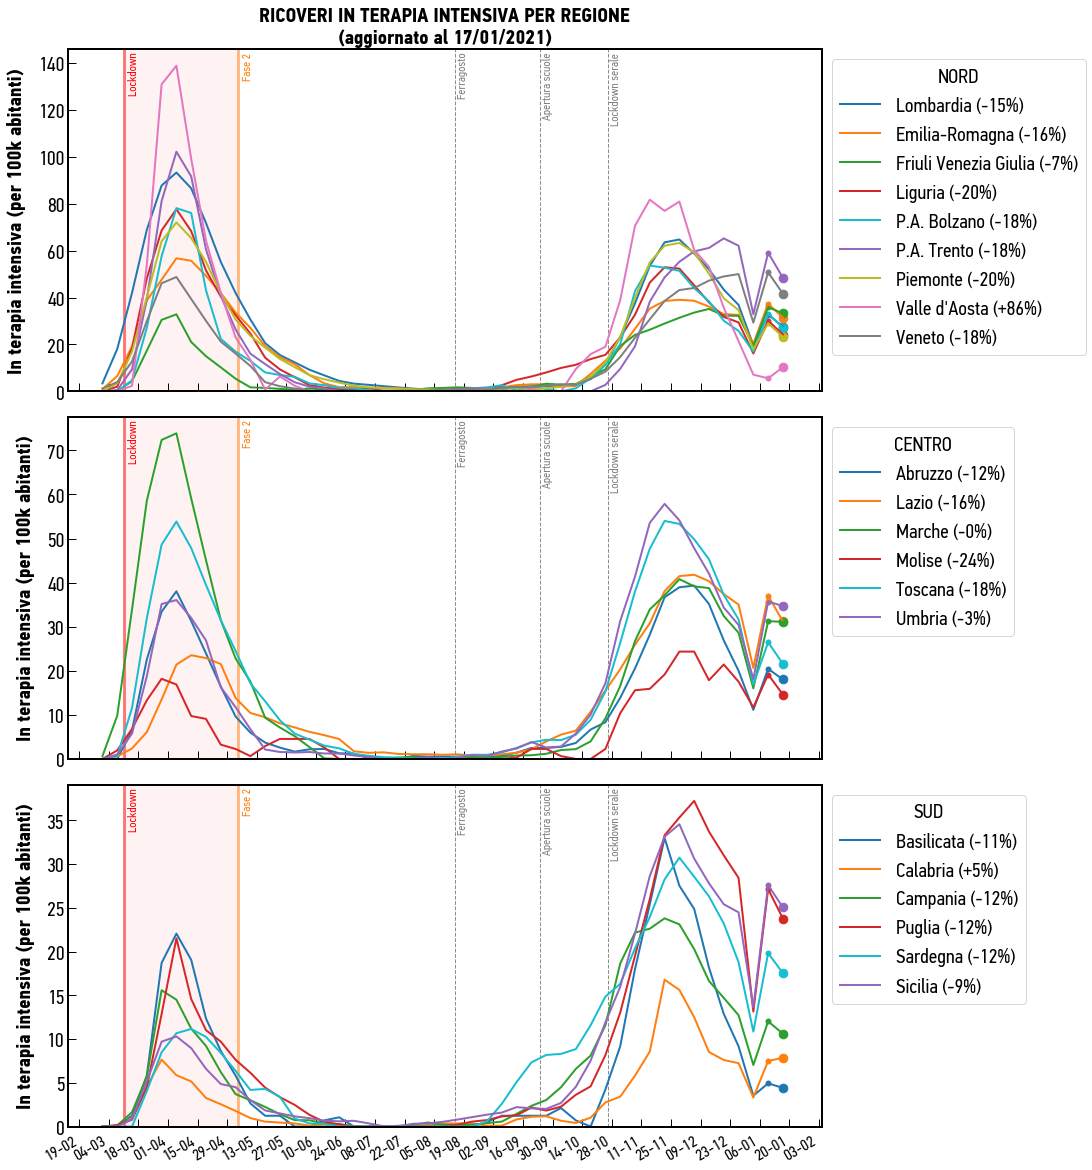

In [78]:
# figure
fig = plt.figure(figsize=(18,22))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 

colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple', 'tab:olive','tab:pink', 'tab:grey']
   
for i, reg in enumerate(nord):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.terapia_intensiva.iat[-2]-df.terapia_intensiva.iat[-3])/df.terapia_intensiva.iat[-3]*100
    ax.plot(df.date[:-1], df.terapia_intensiva_per100k[:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1, lw=2)
    ax.scatter(df.date.iat[-2],df.terapia_intensiva_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    ax.scatter(df.date.iat[-3],df.terapia_intensiva_per100k.iat[-3], label='', color=colors[i], marker='o', s=25)
    ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='NORD')
      
for i, reg in enumerate(centro):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.terapia_intensiva.iat[-2]-df.terapia_intensiva.iat[-3])/df.terapia_intensiva.iat[-3]*100
    ax2.plot(df.date[:-1], df.terapia_intensiva_per100k[:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1, lw=2)
    ax2.scatter(df.date.iat[-2],df.terapia_intensiva_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    ax2.scatter(df.date.iat[-3],df.terapia_intensiva_per100k.iat[-3], label='', color=colors[i], marker='o', s=25)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='CENTRO')
    
for i, reg in enumerate(sud):
    df=ita_weekly[ita_weekly.region==reg]
    k = (df.terapia_intensiva.iat[-2]-df.terapia_intensiva.iat[-3])/df.terapia_intensiva.iat[-3]*100
    ax3.plot(df.date[:-1], df.terapia_intensiva_per100k[:-1], label=reg + ' (%+.f%s)' % (k,'%'), color=colors[i], alpha=1, lw=2)
    ax3.scatter(df.date.iat[-2],df.terapia_intensiva_per100k.iat[-2], label='', color=colors[i], marker='o', s=75)
    ax3.scatter(df.date.iat[-3],df.terapia_intensiva_per100k.iat[-3], label='', color=colors[i], marker='o', s=25)
    ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='SUD')

for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,10000, color='r', linestyles='-', alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,10000, color='tab:orange', linestyles='-', alpha=0.5)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,5,18),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2020,6,3),-1000,10000, color='tab:orange', alpha=0.02)
    #axx.axvspan(datetime.date(2020,5,4),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.02)
    axx.text(datetime.datetime(2020,3,12,23), axx.get_ylim()[1], 'Lockdown ', va='top', ha='left', rotation=90, fontsize=12, color='r')
    axx.text(datetime.datetime(2020,5,5,23), axx.get_ylim()[1], 'Fase 2 ', va='top', ha='left', rotation=90, fontsize=12, color='tab:orange')
    axx.vlines(datetime.datetime(2020,8,15),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,8,15,23), axx.get_ylim()[1], 'Ferragosto ', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    #axx.vlines(datetime.datetime(2020,9,14),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    #axx.text(datetime.datetime(2020,9,14,23), axx.get_ylim()[1], 'Apertura scuole (14/09)', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.vlines(datetime.datetime(2020,9,24),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,9,24,23), axx.get_ylim()[1], 'Apertura scuole ', va='top', ha='left', rotation=90, fontsize=12, color='grey')
    axx.vlines(datetime.datetime(2020,10,26),0,1e6, color='grey', linestyles='--', linewidth=1, alpha=0.9)
    axx.text(datetime.datetime(2020,10,26,23), axx.get_ylim()[1], 'Lockdown serale ', va='top', ha='left', rotation=90, fontsize=12, color='grey')

    
    axx.set_ylabel('In terapia intensiva (per 100k abitanti)')
    axx.set_ylim(bottom=0)
    #for d in np.arange(0,1000,14):
        #axx.vlines(phase2_date+timedelta(days=int(d)),-1000,10000, color='k', linestyles='--', alpha=0.1)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

ax.set_title('RICOVERI IN TERAPIA INTENSIVA PER REGIONE\n(aggiornato al %s)' % df.date.iat[-2].strftime('%-d/%m/%Y'), fontsize=20)

plt.show()

# Posti letto 

In [79]:
#df_ti = pd.read_csv('posti_terapiaintensiva', sep='\t')
df_ti = pd.read_csv('postiletto-30nov2020.csv', sep='\t')

population = []
for region in df_ti.Regioni:
    df = ita[ita.region==region]
    population.append(df.population.iat[0])
df_ti['population'] = population

for var in ['PL in Terapia Intensiva', 'PL Terapia Intensiva attivabili']:
    df_ti[var+'_per100k'] = df_ti.apply(lambda row: row[var]/row.population*1e5, axis = 1)
    
df_ti

Regioni  Ricoverati in Area Non Critica  \
0                 Abruzzo                         714.000   
1              Basilicata                         150.000   
2                Calabria                         400.000   
3                Campania                           2.141   
4          Emilia-Romagna                           2.755   
5   Friuli Venezia Giulia                         633.000   
6                   Lazio                           3.384   
7                 Liguria                         997.000   
8               Lombardia                           7.433   
9                  Marche                         585.000   
10                 Molise                          62.000   
11           P.A. Bolzano                         428.000   
12            P.A. Trento                         415.000   
13               Piemonte                           4.737   
14                 Puglia                           1.692   
15               Sardegna                         580.000   
16                Sicilia                           1.547   
17                Toscana                           1.584   
18                 Umbria                         366.000   
19          Valle d'Aosta                         124.000   
20                 Veneto                        2460.000   
21                 Italia                       33187.000   

    PL in Area Non Critica  Ricoverati in Terapia intensiva  \
0                    1.343                               76   
1                  443.000                               22   
2                  889.000                               42   
3                 5275.000                              182   
4                    5.554                              249   
5                 1277.000                               55   
6                    6.411                              350   
7                    1.837                              113   
8                   15.279                              906   
9                    1.191                               87   
10                 221.000                               14   
11                 365.000                               37   
12                 604.000                               44   
13                   5.824                              388   
14                   3.415                              209   
15                   1.601                               70   
16                   4.251                              226   
17                   5.033                              278   
18                 748.000                               65   
19                 220.000                               11   
20                6000.000                              320   
21               67781.000                             3744   

    PL in Terapia Intensiva  PL Terapia Intensiva attivabili  population  \
0                       184                                0     1320000   
1                        90                                0      567000   
2                       152                               25     1960000   
3                       590                               66     5830000   
4                       747                               10     4450000   
5                       175                                0     1220000   
6                       943                              194     5900000   
7                       222                               12     1560000   
8                      1445                               85    10040000   
9                       195                               65     1530000   
10                       34                               12      308000   
11                       77                                2      531000   
12                       90                               15      541000   
13                      628                               99     4380000   
14                      

Basilicata 0.5291005291005291
Valle d'Aosta 3.1746031746031744
Campania 1.6638078902229845
Calabria 1.3775510204081634
Toscana 3.342245989304813
Abruzzo 3.1060606060606064
Molise 2.5974025974025974
Sicilia 4.240092434015062
Piemonte 3.698630136986301
Sardegna 2.9696969696969697
Liguria 4.038461538461538
Lazio 4.8474576271186445
Emilia-Romagna 5.191011235955056
Lombardia 4.52191235059761
Puglia 3.654320987654321
P.A. Bolzano 4.8964218455743875
Veneto 6.883910386965377
Umbria 5.536723163841808
Friuli Venezia Giulia 5.409836065573771
Marche 5.555555555555556
P.A. Trento 8.502772643253234


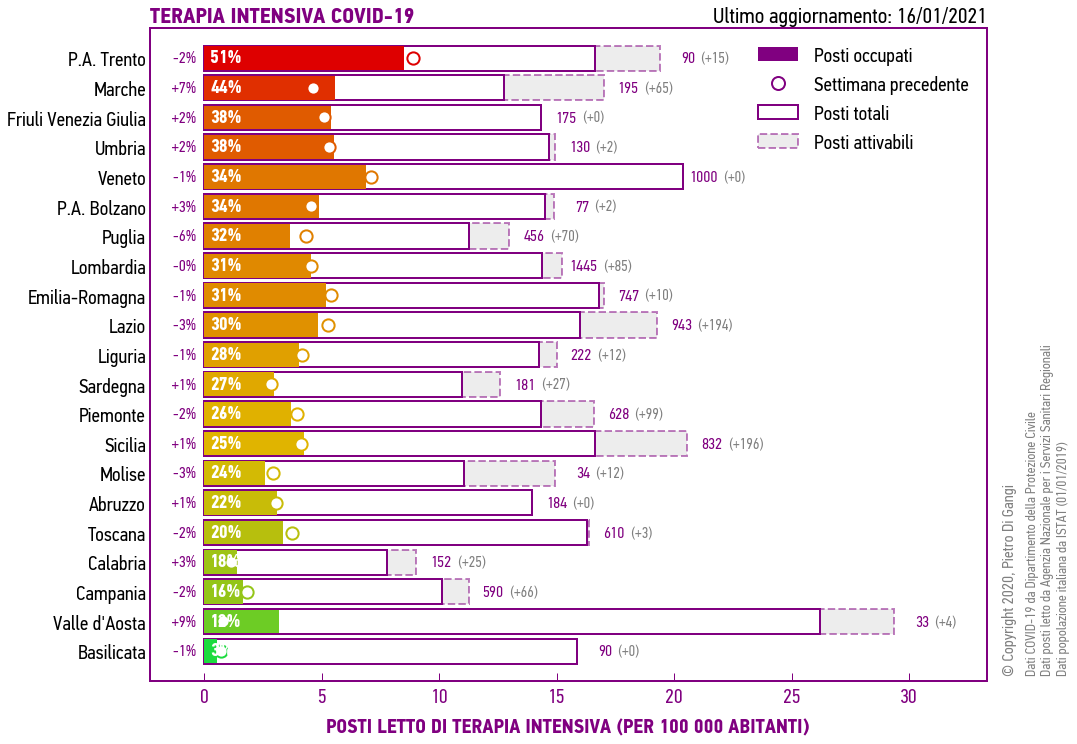

In [80]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ax.tick_params(left=False)

ax.set_xlabel('Posti in terapia intensiva (per 100 000 abitanti)')

# set a color map
minimum = 0 #min(df_week['var'])
maximum = 100 #max(df_week['var'])
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
mapper = cm.ScalarMappable(norm=norm, 
                           cmap=get_continuous_cmap(hex_list=[
                               '#00E148','#E1B800','#E10000','#AF0000','#640000' #RED
                           ]))

regioni = list(df_ti.Regioni)
regioni.remove('Italia')

ti_df_pc = pd.DataFrame(index=regioni, columns=['pc'])

for reg in regioni:
    df = data[data.region==reg]
    df_ = df_ti[df_ti['Regioni']==reg]
    pop = df.population.iat[0]
    ti = df.terapia_intensiva.iat[-1]
    ti_per100k = ti/pop*1e5
    posti = df_['PL in Terapia Intensiva'].iat[0]
    posti_per100k = posti/pop*1e5

    posti_proj = posti + df_['PL Terapia Intensiva attivabili'].iat[0]
    posti_proj_per100k = posti_proj/pop*1e5
    pc = ti/posti*100
    pc_proj = ti/posti_proj*100
    
    ti_df_pc.at[reg,'pc'] = pc
    ti_df_pc.at[reg,'pc_proj'] = pc_proj

regioni = ti_df_pc.sort_values(by='pc', ascending=True).index

for reg in regioni:
    df = data[data.region==reg]
    df_ = df_ti[df_ti['Regioni']==reg]
    pop = df.population.iat[0]
    ti = df.terapia_intensiva.iat[-1]
    ti_var = df.new_terapia_intensiva.iat[-1]
    ti_per100k = ti/pop*1e5
    posti = df_['PL in Terapia Intensiva'].iat[0]
    posti_per100k = posti/pop*1e5

    posti_proj = posti + df_['PL Terapia Intensiva attivabili'].iat[0]
    posti_proj_per100k = posti_proj/pop*1e5
    pc = ti/posti*100
    pc_proj = ti/posti_proj*100
    
    pc_diff = pc - (df.terapia_intensiva.iat[-8]/posti*100)
    
    print(reg, ti_per100k)
    
    # posti occupati
    ax.barh(reg, ti_per100k, color=mapper.to_rgba(pc))
    ax.scatter(df.terapia_intensiva.iat[-8]/pop*1e5, reg, facecolor='w', edgecolor=mapper.to_rgba(pc), marker='o', s=150, lw=2, label='', zorder=100)
    ax.text(0.25, reg, '%.0f%s' % (pc,'%'), va='center', ha='left', color='w', fontsize=18, fontweight="900", zorder=1000)
    
    # settimana precedente
    lb = '  %+.0f%s' % ( pc_diff, '%' )
    ax.text(-0.35, reg, lb, color='purple', ha='right', va='center', fontsize=16, fontweight='100', alpha=1, zorder=200)
        
    # posti disponibili
    ax.barh(reg, posti_per100k, facecolor='w', edgecolor='purple', lw=2, height=0.85, zorder=-500)
    #ax.scatter(posti_per100k, reg, marker='<', color='grey')
    #ax.text(posti_per100k, reg, '   %d' % posti, va='center', fontsize=16, color='grey')
    
    # POSTI PROGRAMMATI
    ax.barh(reg, posti_proj_per100k, facecolor='gainsboro', edgecolor='purple', lw=2, ls='--', height=0.85, alpha=0.5, zorder=-600)

    #ax.scatter(posti_proj_per100k, reg, marker='<', edgecolor='grey', facecolor='')
    ax.text(posti_proj_per100k + 1.5, reg, '%d' % (posti), va='center', ha='right', fontsize=16, color='purple')
    ax.text(posti_proj_per100k + 1.5, reg, '  (+%d)' % (posti_proj-posti), va='center', ha='left', fontsize=15, color='grey')

    #ax.text(ti_per100k, reg, ' %d (%+d)' % (ti,ti_var), va='center', ha='left', fontsize=16, color='grey')
    
color_frame(ax, 'purple')
ax.set_title('Ultimo aggiornamento: %s' % (lastday.strftime('%-d/%m/%Y')), fontweight='100', loc='right')
ax.set_title('TERAPIA INTENSIVA COVID-19', color='purple', fontweight='900', loc='left')

# labels and axes limits
ax.set_xlabel('POSTI LETTO DI TERAPIA INTENSIVA (PER 100 000 ABITANTI)', color='purple')
ax.tick_params(axis='x', which='major', colors='purple')
xmax = ax.get_xlim()[1]*1.08
ax.set_xlim(-0.07*xmax,xmax)

ax.set_ylim(-1,21)


#legend
legend_elements = [
    Patch(facecolor='purple', label='Posti occupati'),
    Line2D([0], [0], label='Settimana precedente', marker='o', markersize=13, markeredgecolor='purple', color='w', markeredgewidth=2, linewidth=0,),
    Patch(facecolor='w', edgecolor='purple', lw=2, label='Posti totali'),
    Patch(facecolor='gainsboro', edgecolor='purple', lw=2, ls='--', alpha=0.5, label='Posti attivabili'),
]
ax.legend(handles=legend_elements, loc='upper right',frameon=False)

# disclaimer
text = '© Copyright 2020, Pietro Di Gangi'
ax.text(1.02*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
text = 'Dati COVID-19 da Dipartimento della Protezione Civile'
ax.text(1.05*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati posti letto da Agenzia Nazionale per i Servizi Sanitari Regionali'
ax.text(1.07*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati popolazione italiana da ISTAT (01/01/2019)'
ax.text(1.09*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)

plt.show()

In [81]:
def overview(regions):
    var = 'new_cases'
    cumvar = var.replace("new_", "")
    title = 'COVID-19 ' +regions[0]+ ' | Fase 2 (%s)' % lastday.strftime('%-d %b %Y') 
    ylabel = 'Nuovi casi per 100k abitanti'



    # figure
    fig = plt.figure(figsize=(18,18))
    grid = plt.GridSpec(5, 3, hspace=0.1, wspace=0.35)
    ax = fig.add_subplot(grid[:-3, 1:])
    #y_ax = fig.add_subplot(grid[:-1, 0])#, xticks=[])#, sharey=ax)
    x_ax = fig.add_subplot(grid[-3, 1:], sharex=ax)
    x_ax2 = fig.add_subplot(grid[-2, 1:], sharex=ax)
    x_ax3 = fig.add_subplot(grid[-1, 1:], sharex=ax)
    #x_ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(labelbottom=False) 
    x_ax.tick_params(labelbottom=False) 
    x_ax2.tick_params(labelbottom=False) 

    data = ita[ita.date>=phase2_date]

    # main panel plot data
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df['population'].iat[0]        
        tot = df[var].iat[-1]
        cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
        lb = '%s: %.f (+%.1f%s)' % (reg, tot, tot/cumtot*100, '%')
        if reg=='Italia':
            ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=3, ls='--')
        else:
            ax.bar(df.date, df[var]/pop*1e5, label=lb, color='tab:blue')

    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=0)
    #ax.yaxis.set_label_position("right")

    leg = ax.legend(loc=0, title='Nuovi casi') 
    leg._legend_box.align = "left"


    df = data[data.region==regions[0]]
    
    # bottom panel
    ax2 = x_ax.twinx()
    ax2.set_ylabel('Tamponi positivi [%]', color='r')
    ax2.tick_params(colors='r')
    #ax2.set_yticks(np.arange(0,55,1))
    #ax2.set_ylim(0)
    ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
    x_ax.set_ylabel('Tamponi')
    var = 'new_tests'
    cumvar = var.replace("new_", "")
    tot = df[var].iat[-1]
    lb1 = 'Tamponi: +%d' % (df[var].iat[-1])
    b1 = x_ax.bar(df.date, df[var], label=lb1, color='mediumseagreen')

    lb3 = 'Positività: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
    l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

    handles = [b1, l]
    labels = [lb1, lb3]
    ax2.legend(handles, labels, loc='upper left')
    ax2.set_ylim(bottom=0)
    #x_ax.set_ylim(500)

    
    
    # bottom panel 2
    x_ax2.grid(axis='y', linewidth=3, alpha=0.1, which='major')
    
    x_ax2.plot(df.date, df.terapia_intensiva, color='tab:purple', lw=2, alpha=0.5, label='Attuali ricoverati in terapia intensiva: %d' % df.terapia_intensiva.iat[-1])
    x_ax2.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=5, alpha=0.5, label='Nuovi ricoveri in terapia intensiva (stima): +%d' % df.new_terapia_intensiva_netta.iat[-1])
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_max, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta_min, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.legend(loc=0)
    x_ax2.set_ylabel('Terapia intensiva')
    #x_ax2.set_ylim(bottom=0.5)
    
    
    # bottom panel 3
    x_ax3.grid(axis='y', linewidth=3, alpha=0.1, which='major')

    if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_ricoverati_con_sintomi, color='tab:orange', label='Variazione ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))

    if df.new_terapia_intensiva.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_terapia_intensiva, color='purple', label='Variazione ricoverati in terapia intensiva: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))
    
    x_ax3.legend(loc=0)
    x_ax3.set_ylabel('Variazione\ngiornaliera')

    '''
    for axx in [ax,x_ax,x_ax2,x_ax3]:
        axx.autoscale(False)
        for d in np.arange(0,1000,14):
            axx.vlines(phase2_date+timedelta(days=int(d)),-1000,80000, color='k', linestyles='--', alpha=0.1)
    '''

    # axes settings
    ax.set_xlim(left = phase2_date)
    #ax.set_ylim(bottom = 0.1)
    #plt.ylabel(ylabel)
    #plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    #plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

    #legend

    ax.set_title(title , fontsize=20)

    # disclaimer
    dayspan = df.date.iat[-1] - phase2_date
    text = '© Copyright 2020, Pietro Di Gangi'
    ax.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    ax.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione ISTAT (01/01/2019)'
    ax.text(lastday+0.17*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()

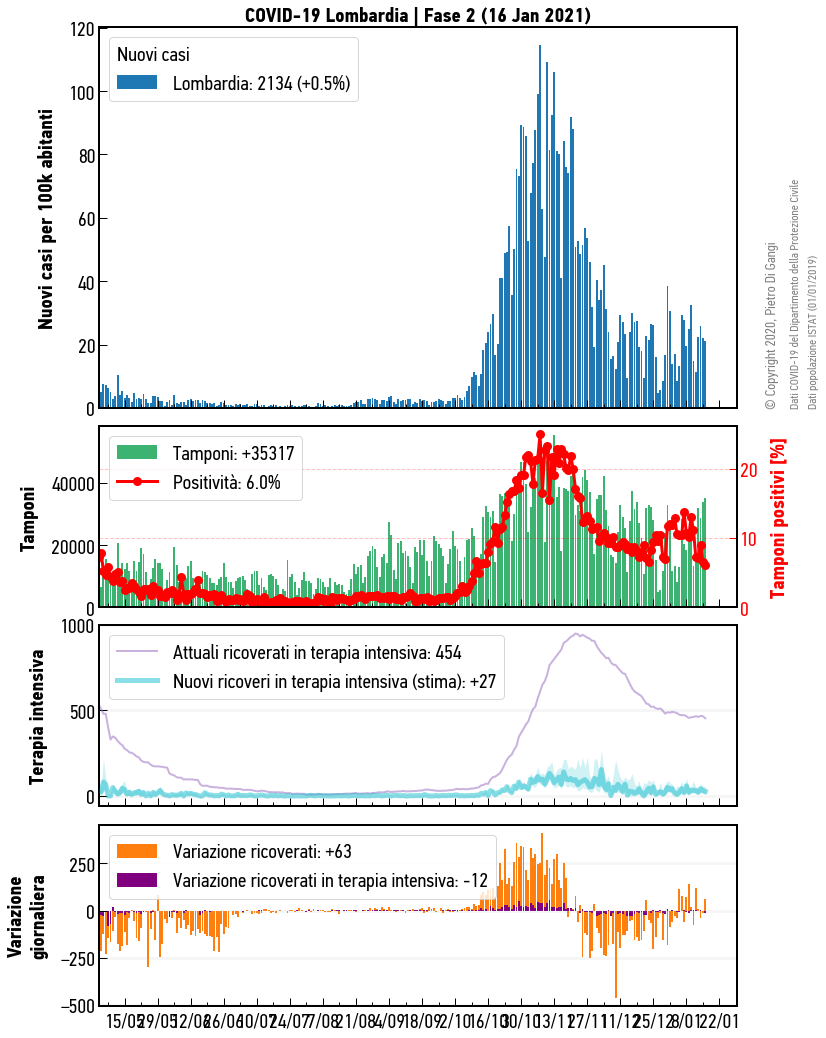

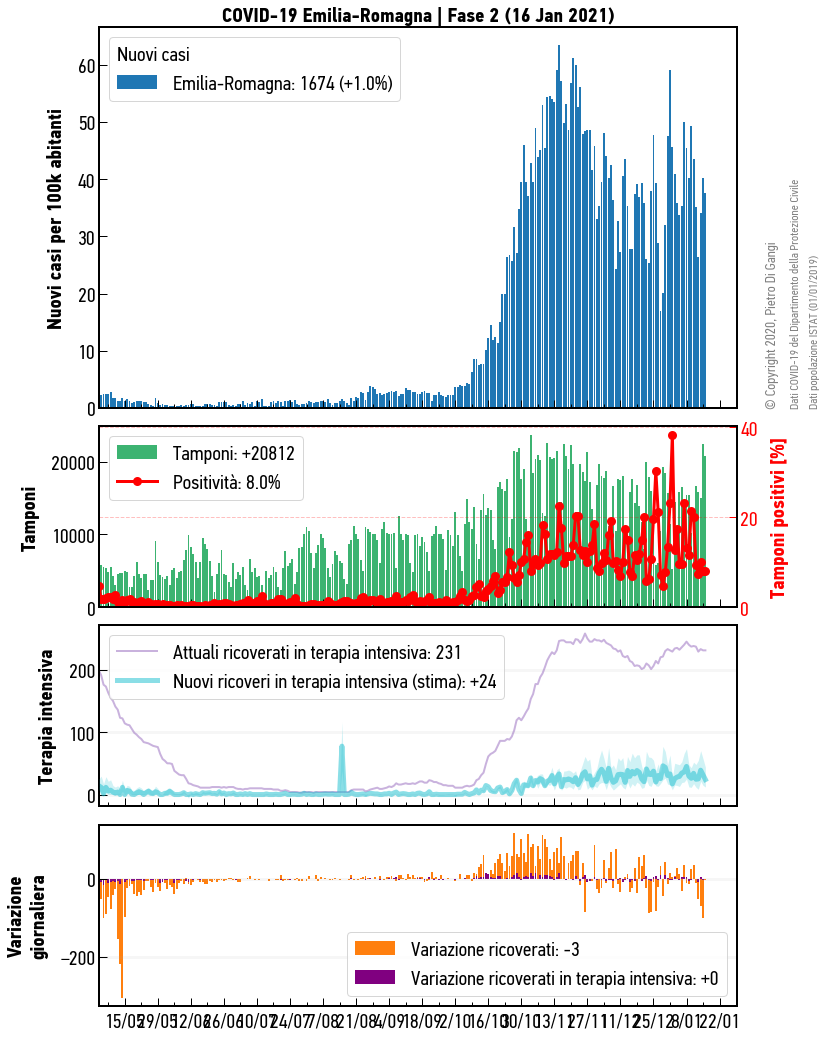

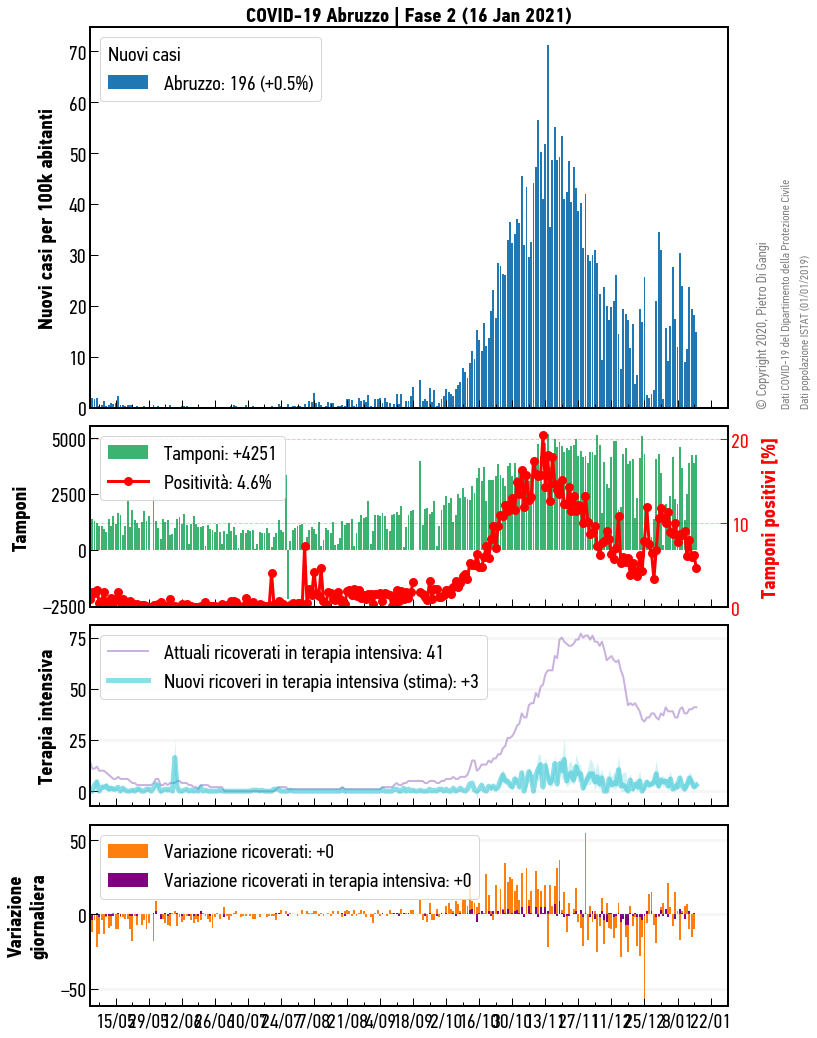

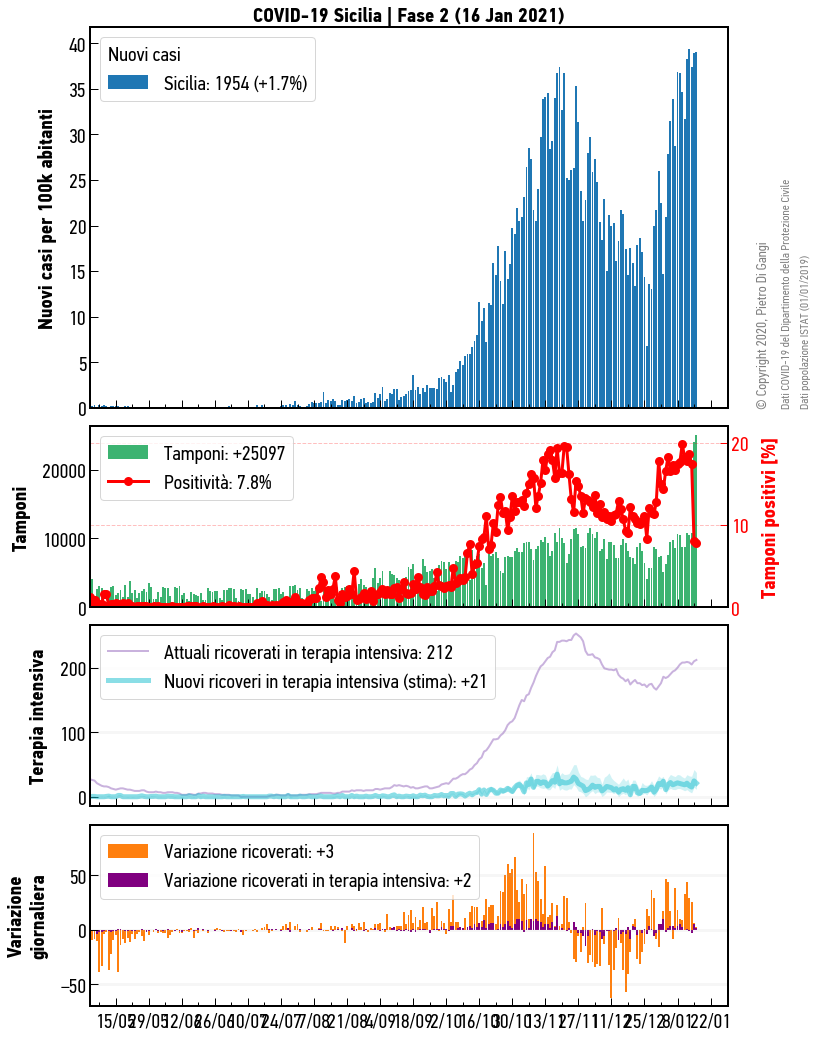

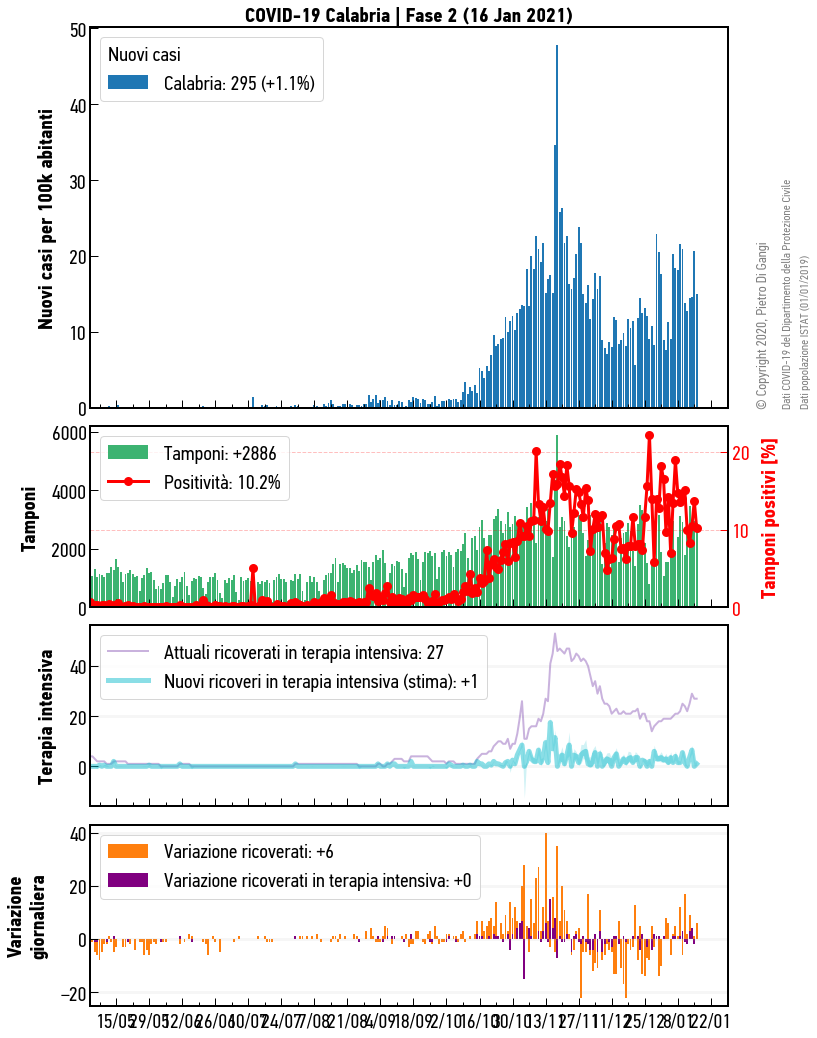

In [82]:
overview(['Lombardia'])
overview(['Emilia-Romagna'])
overview(['Abruzzo'])
overview(['Sicilia'])
overview(['Calabria'])

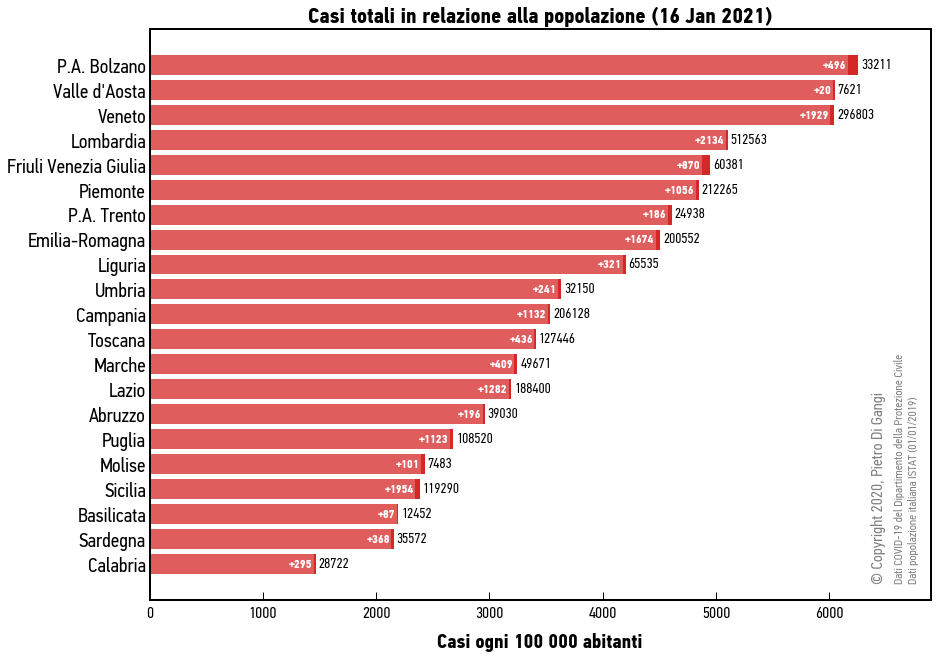

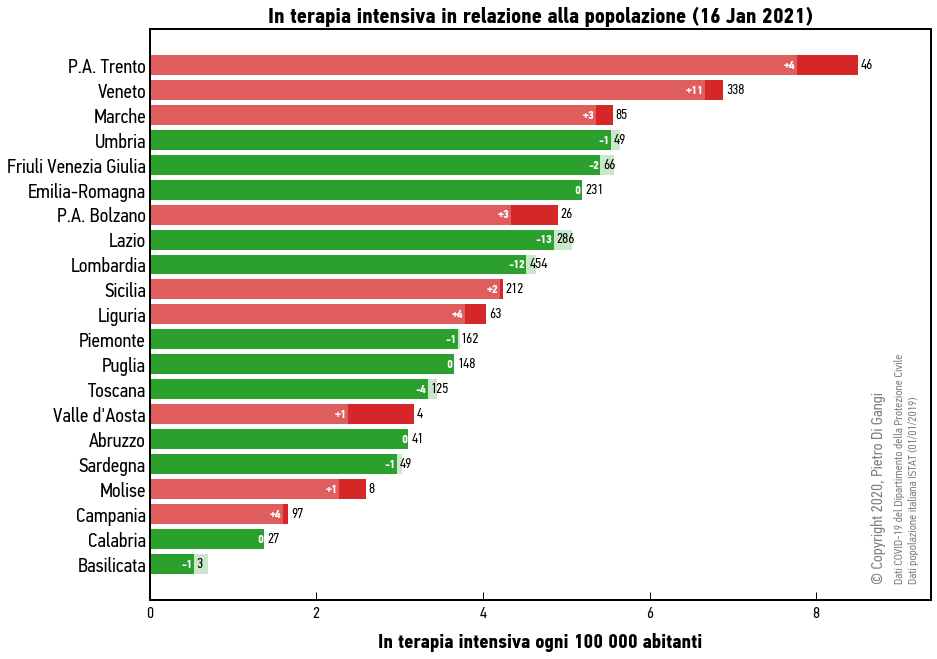

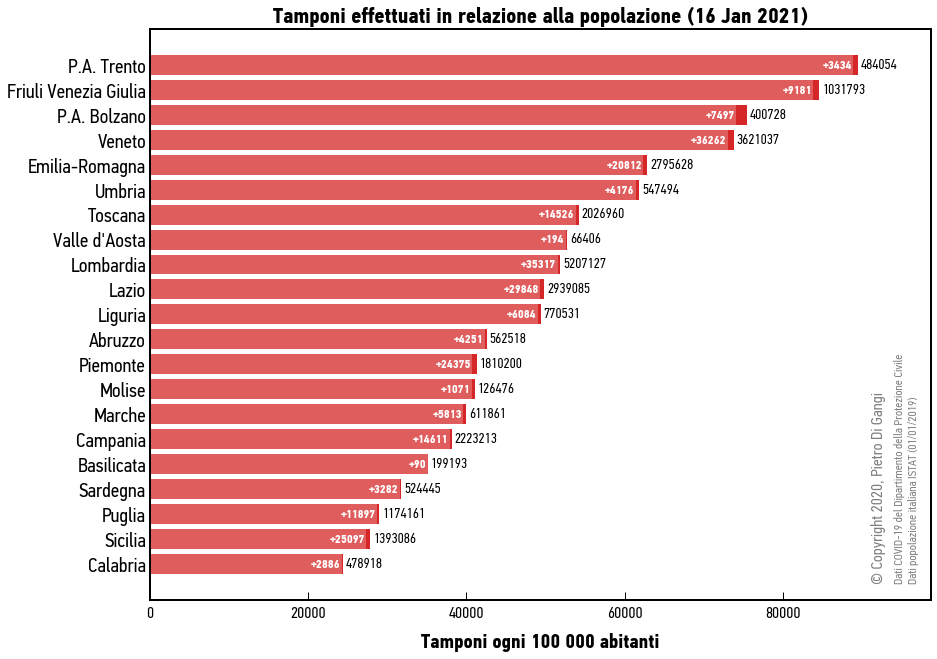

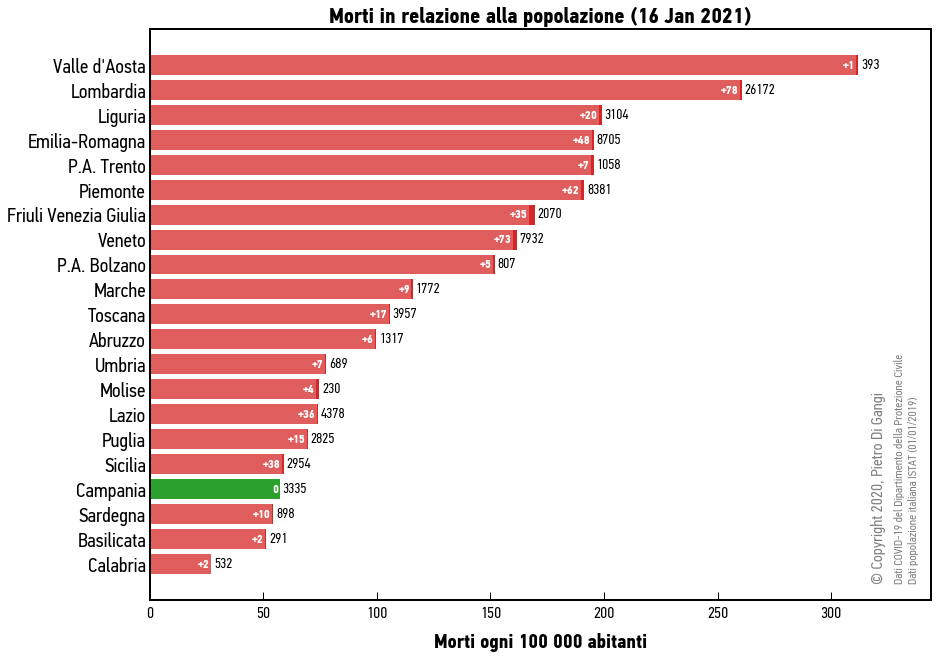

In [83]:
def standing_normalized(states, var, title='', xlabel='x', colors=['tab:red','tab:green']):

    n = len(states)*0.1
    data = ita
    
    fig = plt.figure(figsize=(14,5*n))
    ax = fig.add_subplot(111)
    ax.tick_params(left=False) 
    xmax = data[data.region==states[0]][var+'_per100k'].iat[-1]
    #states = sorted_states(states, var+'_per100k')
    states = states[::-1]
    
    for i,state in enumerate(states):
        df = data[data.region==state]
        pop = data.population.iat[0]
        tot = df[var].iat[-1]
        today = df[var+'_per100k'].iat[-1]
        yesterday = df[var+'_per100k'].iat[-2]
        if today>yesterday:
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:red', label='', alpha=1)
            ax.barh(state, df[var+'_per100k'].iat[-2], color='white', label='', alpha=0.25)        
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-2]-1*xmax/500, state, ('+%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
        else:
            ax.barh(state, df[var+'_per100k'].iat[-2], color='tab:green', label='', alpha=0.25)
            ax.barh(state, df[var+'_per100k'].iat[-1], color='tab:green', label='', alpha=1)
            lb = '%d' % (tot)
            ax.text(df[var+'_per100k'].iat[-1]+2*xmax/500, state, lb, ha='left', va='center', fontsize=14)
            ax.text(df[var+'_per100k'].iat[-1]-1*xmax/500, state, ('%d' % df['new_'+var].iat[-1]), ha='right', va='center', color='w', fontsize=12, weight='bold')
            
    plt.xlabel(xlabel)
    #ax.grid(axis='x', linewidth=2, alpha=0.1, which='major')
    ax.tick_params(axis='x', which='major', labelsize=16)
    
    xmin, xmax = ax.get_xlim() 
    ax.set_xlim(0,xmax*1.05)
    
    #legend
    plt.title(title+' (%s)' % lastday.strftime('%-d %b %Y'), fontsize=22)
    
    # disclaimer
    text = '© Copyright 2020, Pietro Di Gangi'
    plt.text(0.97*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=16)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    plt.text(1.00*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione italiana ISTAT (01/01/2019)'
    plt.text(1.02*xmax, -0.8, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()       

        
states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('cases_per100k', ascending=False).region.unique()
standing_normalized(states, 'cases', 'Casi totali in relazione alla popolazione', 'Casi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('terapia_intensiva_per100k', ascending=False).region.unique()
standing_normalized(states, 'terapia_intensiva', 'In terapia intensiva in relazione alla popolazione', 'In terapia intensiva ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('tests_per100k', ascending=False).region.unique()
standing_normalized(states, 'tests', 'Tamponi effettuati in relazione alla popolazione', 'Tamponi ogni 100 000 abitanti')

states = data[(data.region.isin(nord+centro+sud))&(data.date==lastday)].sort_values('deaths_per100k', ascending=False).region.unique()
standing_normalized(states, 'deaths', 'Morti in relazione alla popolazione', 'Morti ogni 100 000 abitanti')

[-1.07965966e-13  9.99999999e-01 -1.68067649e+14]
[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


Text(365.07292146844105, 0, 'Dati posti letto disponibili da Il Sole 24 Ore (13/10/2020)')

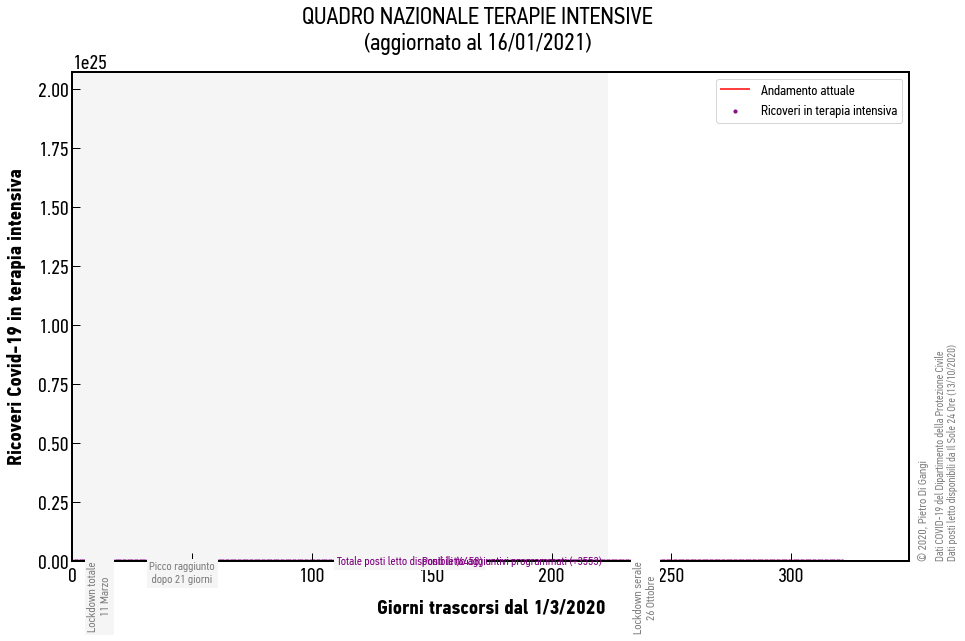

In [84]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df = data[data.region=='Italia']

x = [(x-pd.Timestamp(datetime.datetime(2020,3,1))).days for x in df.date]
y = df.terapia_intensiva
ax.scatter(x, y, color='purple', s=10, alpha=0.9, label='Ricoveri in terapia intensiva')



#print(x_,y_)

from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c

day0 = 230

yy = y[day0:]
xx = x[:len(yy)]
popt, pcov = curve_fit(func, xx, yy)
print(popt)

print(xx)
yy = [func(_,*popt) for _ in xx]
ax.plot(x[day0:],yy, color='r', lw=2, label='Andamento attuale', alpha=0.75)

x0 = x[-1]-xx[-1]

dayspan = 30
xxx = np.linspace(xx[-1],xx[-1]+dayspan,dayspan)
yyy = [func(_,*popt) for _ in xxx]
#ax.plot(np.linspace(xx[-1]+x0,xx[-1]+x0+dayspan,dayspan),yyy, ls='--', lw=2, color='r', label='Proiezione futura')

for step in (7,14,21,28):
    day = xx[-1]+x0+step
    y = func(day-x0,*popt)
    #ax.scatter(day, y, color='r', s=50)
    #ax.text(day, y, '  %+d giorni' % step, fontsize=12, ha='left', va='center', color='grey')
#ax.plot(np.linspace(xx[-1]+x0,xx[-1]+x0+14,14),yyy, ls='--', lw=2, label='+14 giorni')

ax.set_xlim(0, ax.get_xlim()[1]+12)
ax.legend(fontsize=14)


#posti letto terapia intensiva disponibili (9 Ottobre)
icu = 6458
#programmati
icu_proj = 3553 + icu

ax.hlines(icu, ax.get_xlim()[0], ax.get_xlim()[1], linestyle=':', lw=2, color='purple')
ax.hlines(icu_proj, (pd.Timestamp(datetime.datetime(2020,10,10))-pd.Timestamp(datetime.datetime(2020,3,1))).days, ax.get_xlim()[1], linestyle=':', lw=2, color='purple')
ax.text(110, icu, 'Totale posti letto disponibili (%d)' % icu, color='purple', backgroundcolor='whitesmoke', va='center', fontsize=12)
ax.text((pd.Timestamp(datetime.datetime(2020,10,10))-pd.Timestamp(datetime.datetime(2020,3,1))).days,
        icu_proj, 'Posti letto aggiuntivi programmati (+%d)  ' % (icu_proj-icu), color='purple', va='center', ha='right', fontsize=12)


ax.set_xlabel('Giorni trascorsi dal 1/3/2020')
ax.set_ylabel('Ricoveri Covid-19 in terapia intensiva')

ax.vlines(11, ax.get_ylim()[0], 5500, linestyle='--', lw=1, color='grey')
ax.vlines(32, ax.get_ylim()[0], 5500, linestyle='--', lw=1, color='grey')
ax.text(11, 5500, 'Lockdown totale\n11 Marzo', rotation=90, va='top', ha='center', color='grey', backgroundcolor='whitesmoke', fontsize=12)
ax.text(32, 5500, 'Picco raggiunto\n dopo 21 giorni', color='grey', va='top', ha='left', backgroundcolor='whitesmoke', fontsize=12)

ax.vlines((pd.Timestamp(datetime.datetime(2020,10,26))-pd.Timestamp(datetime.datetime(2020,3,1))).days, ax.get_ylim()[0], 5500, linestyle='--', lw=1, color='grey')
ax.text((pd.Timestamp(datetime.datetime(2020,10,26))-pd.Timestamp(datetime.datetime(2020,3,1))).days, 5500, 'Lockdown serale\n26 Ottobre', rotation=90, va='top', ha='center', color='grey', backgroundcolor='w', fontsize=12)

ax.set_ylim(bottom=0)

ax.axvspan(0, 230-7, ax.get_ylim()[0], ax.get_ylim()[1], color='whitesmoke', zorder=-1000)

plt.suptitle('QUADRO NAZIONALE TERAPIE INTENSIVE\n(aggiornato al %s)' % lastday.strftime('%-d/%m/%Y'))


# disclaimer
text = '© 2020, Pietro Di Gangi'
ax.text(ax.get_xlim()[1]*1.01, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
ax.text(ax.get_xlim()[1]*1.03, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=11)
text = 'Dati posti letto disponibili da Il Sole 24 Ore (13/10/2020)'
ax.text(ax.get_xlim()[1]*1.045, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=11)